Prélude: Installation de l'environnement conda

In [2]:
#conda env create -f environment.yml

In [3]:
#!pip install scikit-learn
#!pip install matplotlib
#!pip install seaborn
#!pip install optuna
#!pip install xgboost
#!pip install catboost
#!pip install shap
#!pip install mlflow

In [35]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import optuna
import shap
import mlflow
from PIL import Image
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from catboost import CatBoostRegressor

# Phase 0

Dans cette phase initiale, nous allons détailler et définir clairement notre use case. Cette étape est essentielle pour assurer que toutes les parties prenantes aient une compréhension commune des objectifs du projet, des contraintes, et des résultats attendus. 

**En quoi consiste la Phase 0**

1. **Définir les Objectifs du Projet** :
   - **Qu'est-ce que nous essayons de réaliser ?** : Définir clairement le problème que nous cherchons à résoudre. Dans le cas présent, il s'agit de prédire les prix des propriétés immobilières.
   
2. **Identifier les Parties Prenantes et leurs Exigences** :
   - **Qui est impliqué et que veulent-ils ?** : Identifier les utilisateurs finaux, les décideurs et toute autre personne impactée par le projet. Recueillir leurs besoins et attentes spécifiques.

3. **Définir les Critères de Succès** :
   - **Comment saurons-nous si nous avons réussi ?** : Établir des métriques et des critères clairs pour évaluer le succès du projet.

4. **Élaborer un Plan de Projet Initial** :
   - **Quel est notre plan d'action ?** : Créer un plan de projet détaillant les étapes à suivre, les ressources nécessaires, les échéanciers, et les responsabilités. 

## Use case : Plateforme d'estimation immobilière éthique 

**Notre vision**

Notre startup développe une plateforme éthique et transparente pour l'estimation immobilière à Ames, Iowa. Nous offrons des évaluations précises des biens immobiliers en fonction des conditions actuelles du marché. Les vendeurs peuvent ajouter leurs données gratuitement, améliorant ainsi la qualité de notre dataset, tandis que les acheteurs souscrivent pour consulter ces informations, incluant le prix de vente réel et notre estimation du juste prix. 

**Notre objectif**

L'objectif de notre plateforme est de fournir un outil pratique et fiable pour les acheteurs et les vendeurs, afin de déterminer le juste prix des propriétés à Ames. En évitant les estimations trop élevées ou trop basses, nous favorisons la transparence sur le marché immobilier local. Pour assurer la précision de nos évaluations, la plateforme ne fournit pas d'estimations pour certains biens spécifiques comme les mobile homes ou les manoirs de célébrités, en raison de leur caractère peu commun et des difficultés liées à leur estimation. 

**Caractéristiques principales**

- Estimations précises : Utilisation d'un modèle prédictif avancé intégrant jusqu’à 79 des variables que les vendeurs peuvent introduire pour décrire leur bien. 

- Transparence et éthique : Les vendeurs sont incités à fournir le vrai prix de vente lorsqu'ils retirent une annonce, contribuant ainsi à la précision des données et aux estimations objectives. 

- Feedback utilisateur : Les utilisateurs peuvent signaler des erreurs dans les estimations, ainsi que des valeurs exorbitantes ou bizarres, permettant une amélioration continue de l'algorithme. 

**Monétisation** 

- Abonnements : L’accès à la plateforme est payant pour les acheteurs. 

- Pénalités pour non-disclosure : Les vendeurs qui refusent de divulguer les raisons du retrait de leur annonce ou le vrai prix de vente sont soumis à une taxe. 

**Mise en œuvre**

- Développement technique : Construction et amélioration du modèle prédictif avec une intégration des retours d’utilisateurs pour corriger les biais. 

- Collecte de données : Incitation pour les vendeurs à entrer les données précises, en soulignant l'importance de la qualité des données pour une évaluation fiable. 

- Lancement et marketing : Campagne de sensibilisation sur l'importance des données précises et des estimations équitables. 

**Impact attendu** 

La plateforme vise à transformer le marché immobilier à Ames en renforçant la transparence et l'équité, aidant ainsi les acheteurs à prendre des décisions éclairées et permettant aux vendeurs de contribuer à des estimations justes de leurs propriétés sans frais. Les données doivent être de bonne qualité impérativement, notamment les vrais prix de vente, car sans cela, notre algorithme ne peut pas être bien entraîné.  

**Métriques d'évaluation**

- Métrique mathématique : Le Root Mean Squared Log Error (RMSLE) est choisi pour son approche des erreurs relatives plutôt qu’absolues, idéal dans l’estimation immobilière où les valeurs varient largement. Cette métrique réduit l'impact des erreurs importantes pour des propriétés à haute valeur, garantissant ainsi des évaluations équitables et favorisant la transparence de notre plateforme. 

- Métrique métier : Suivi de la précision des prédictions par rapport aux prix de vente finaux, notamment lorsque les vendeurs retirent leurs annonces. Nous demandons la raison du retrait et le vrai prix de vente, avec une taxe imposée si ces informations ne sont pas fournies. 

- Métrique du succès financier : La réussite financière du projet sera évaluée en fonction du taux d'adoption par les utilisateurs et de leur satisfaction, indépendamment des valeurs des propriétés estimées. 

**Étapes du projet**

1. Business understanding : Compréhension des besoins du marché immobilier à Ames et définition des objectifs de la plateforme. 

2. Data understanding : Exploration des données disponibles, identification des variables clés et compréhension de leur influence sur les prix des propriétés. 

3. Data engineering : Préparation et nettoyage des données, gestion des valeurs manquantes et création de nouvelles variables pertinentes (feature engineering). 

4. Modélisation (tuning) : Développement et optimisation des modèles prédictifs, incluant les techniques avancées comme le random forest et le gradient boosting. 

5. Évaluation : Évaluation des performances des modèles à l'aide de la métrique RMSLE, analyse des biais et des erreurs, et validation croisée. 

6. Déploiement : Mise en production du modèle sélectionné, intégration dans la plateforme et mise en place d'un système de monitoring pour assurer la performance continue et l'amélioration basée sur les retours d'utilisateurs.


## ML canvas

![description de l'image](MLCanvas.png)

# Phase d'Idéation

La phase d'idéation est une étape cruciale dans le développement d'un projet de machine learning. Elle consiste à explorer, analyser et comprendre les données disponibles, à formuler des hypothèses sur ces données, et à concevoir un modèle de base qui servira de référence pour les améliorations futures. Voici les étapes clés de cette phase et pourquoi elles sont importantes :

**Pourquoi la phase d'idéation est importante ?**

- **Compréhension des données :** Avant de créer un modèle performant, il est essentiel de bien comprendre les données sur lesquelles ce modèle sera basé. Cela inclut la structure des données, les valeurs manquantes, les distributions des variables, et les relations potentielles entre elles.
- **Validation des hypothèses :** Formuler et tester des hypothèses permet de vérifier des croyances intuitives ou des théories sur les données. Cela peut révéler des insights importants et des patterns cachés.
- **Construction d'un modèle de référence :** Un modèle baseline simple permet de mesurer les performances initiales et de servir de point de comparaison pour évaluer les améliorations apportées par des modèles plus sophistiqués.

## Data mining & Data analysis

**Qu'est-ce que c'est ?**

- **Data mining:** Extraire des informations et des motifs cachés à partir de données brutes.
- **Data analysis:** Processus d'inspection, de nettoyage, de transformation et de modélisation des données dont le but est de découvrir des informations utiles, de tirer des conclusions et de soutenir la prise de décision.

Dans cette étape, nous allons charger nos données et examiner leurs caractéristiques principales. L'objectif est de comprendre la structure et la qualité des données afin de préparer une base solide pour les étapes suivantes.

Nous allons ensuite émettre quelques hypotèses et utiliser des graphiques pour visualiser les relations entre les variables. Ceci va nous aider mieux apréhender les données pour notre modèle baseline.

### Analyse des données disponibles
Fichiers disponibles : 
- `train.csv` - Les données d'entraînement
- `test.csv` - Les données de test
- `data_description.txt` - Descriptions des données et signification des valeurs
- `sample_submission.csv` - Soumission de référence

Après analyse du fichier `data_description.txt`, nous remarquons que les données comportent un bon nombre de colonnes catégorielles. Il faudra veiller à traiter correctement les colonnes qui désignent des catégories de logement mais avec des nombres.

### Exploration des données
Pour commencer, nous chargeons le jeu des données d'entraînement à partir du fichier `train.csv` dans un DataFrame. La colonne `Id` fera office d'index afin de faciliter l'identification des enrengistrements.

Nous effectuons ensuite plusieurs manipulations nécessaires au sein du DataFrame pour la compréhension des données.
- Étape 1 : Afficher les premières lignes pour un aperçu de la structure des données et vérifier le chargement.
- Étape 2 : Afficher les informations basiques du DataFrame pour avoir une idée du nombre de colonnes et de leurs types.
- Étape 3 : Compter les valeurs null pour établir le traitement adéquat.


Pour nous donner une idée de la représentation des biens, nous terminerons par un graphique de la distribution des prix de vente.

In [6]:
# Chargement des données
train_path = 'data/train.csv'
train_data = pd.read_csv(train_path , index_col="Id")

test_path = 'data/test.csv'
test_data = pd.read_csv(test_path , index_col="Id")

In [7]:
# Étape 1 : Afficher les première lignes du DataFrame
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Étape 2 : Afficher les informations basiques du DataFrame
train_data.info()
train_data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

(1460, 80)

In [9]:
# Étape 3 : Compter les valeurs null
missing_values_train = train_data.isnull().sum().sort_values(ascending=False)

print(missing_values_train[missing_values_train > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


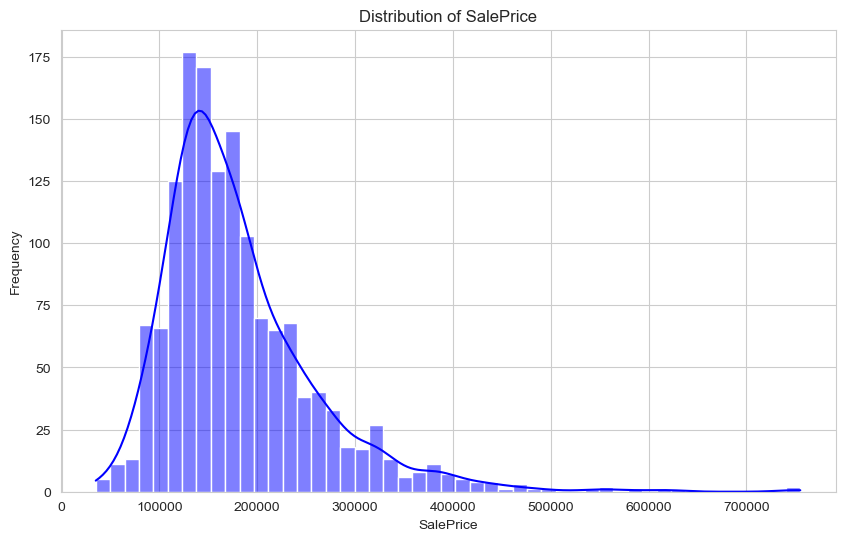

In [10]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### Émission d'hypothèses sur les données

Dans cette section, nous allons émettre et tester plusieurs hypothèses concernant les données pour mieux comprendre les facteurs influençant les prix des propriétés. 

**Pourquoi émettre des hypothèses ?**

Cela permet de structurer notre exploration des données en se basant sur des connaissances préalables et des intuitions logiques. Les hypothèses nous aident à :

- **Diriger l'analyse :** En ayant des hypothèses, nous pouvons orienter notre analyse vers des aspects spécifiques des données, ce qui permet de gagner du temps et d'être plus efficace.
- **Valider des théories :** Les hypothèses nous permettent de tester des théories et des idées sur les données. Cela peut aider à confirmer ou infirmer des croyances courantes ou des résultats de recherches antérieures.
- **Détecter des relations :** En formulant des hypothèses, nous pouvons identifier et examiner des relations potentielles entre les variables, ce qui peut révéler des patterns importants.
- **Améliorer les modèles :** Les hypothèses peuvent guider la sélection des variables et des caractéristiques à inclure dans les modèles de machine learning, améliorant ainsi leur performance et leur interprétabilité.

#### Hypothèse 1 : La surface habitable totale a une forte corrélation avec le prix de vente.

Il est raisonnable de penser que les maisons avec une plus grande surface habitable seront vendues plus chères car elles offrent plus d'espace de vie.

Nous allons vérifier cette hypothèse en traçant un scatter plot entre la superficie habitable et le prix des propriétés.

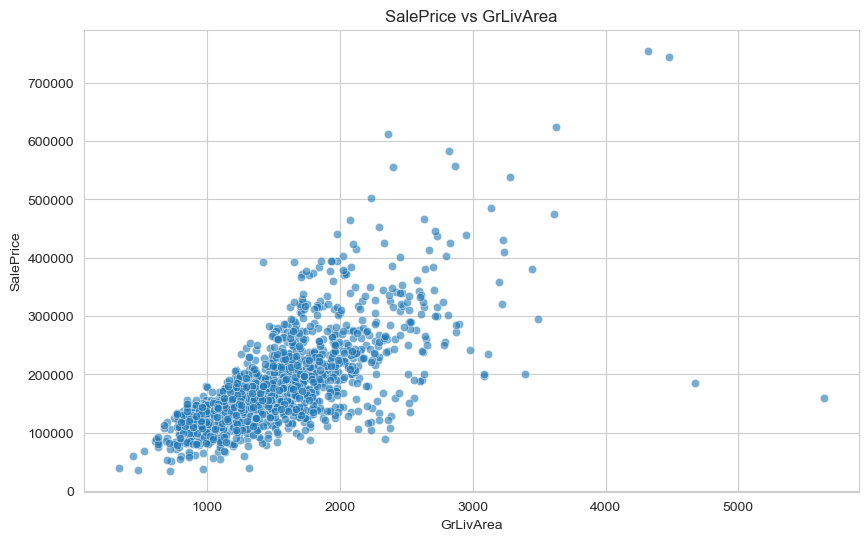

Correlation between GrLivArea and SalePrice: 0.71


In [11]:
# Scatter plot for GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], alpha=0.6)
plt.title('SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Calcul de la corrélation
correlation_grlivarea_saleprice = train_data['GrLivArea'].corr(train_data['SalePrice'])
print(f"Correlation between GrLivArea and SalePrice: {correlation_grlivarea_saleprice:.2f}")

#### Hypothèse 2 : Les maisons situées dans certains quartiers se vendent à des prix significativement plus élevés.

La localisation est un facteur clé dans l'immobilier. Certains quartiers, en raison de leur proximité avec des commodités, leur sécurité ou leur prestige, peuvent voir leurs prix augmenter significativement.

Nous allons vérifier cette hypothèse en utilisant des box plots pour comparer les prix de vente entre différents quartiers.

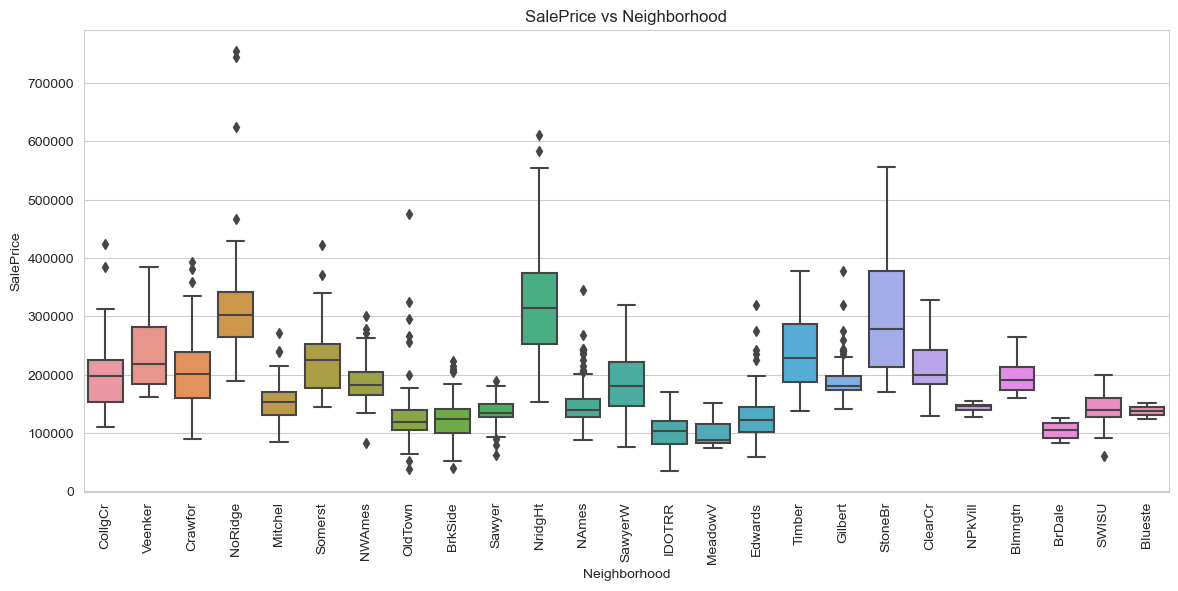

                       mean            std        25%       50%        75%
Neighborhood                                                              
Blmngtn       194870.882353   30393.229219  174000.00  191000.0  213490.00
Blueste       137500.000000   19091.883092  130750.00  137500.0  144250.00
BrDale        104493.750000   14330.176493   91000.00  106000.0  118000.00
BrkSide       124834.051724   40348.689270  100500.00  124300.0  141175.00
ClearCr       212565.428571   50231.538993  183750.00  200250.0  242225.00
CollgCr       197965.773333   51403.666438  152958.75  197200.0  225725.00
Crawfor       210624.725490   68866.395472  159250.00  200624.0  239000.00
Edwards       128219.700000   43208.616459  101500.00  121750.0  145225.00
Gilbert       192854.506329   35986.779085  174000.00  181000.0  197200.00
IDOTRR        100123.783784   33376.710117   81000.00  103000.0  120500.00
MeadowV        98576.470588   23491.049610   83500.00   88000.0  115000.00
Mitchel       156270.1224

In [12]:
# Boxplot for SalePrice vs Neighborhood
plt.figure(figsize=(14, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.title('SalePrice vs Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)
plt.show()

# Statistiques descriptives par quartier
neighborhood_stats = train_data.groupby('Neighborhood')['SalePrice'].describe()
print(neighborhood_stats[['mean', 'std', '25%', '50%', '75%']])

#### Hypothèse 3 : L'année de construction influence positivement le prix de vente.

Les maisons plus récentes pourraient être plus chères en raison de matériaux de construction modernes, d'une meilleure isolation, et de conceptions plus actuelles.

Nous allons vérifier cette hypothèse en traçant un scatter plot entre l'année de construction et le prix de vente.

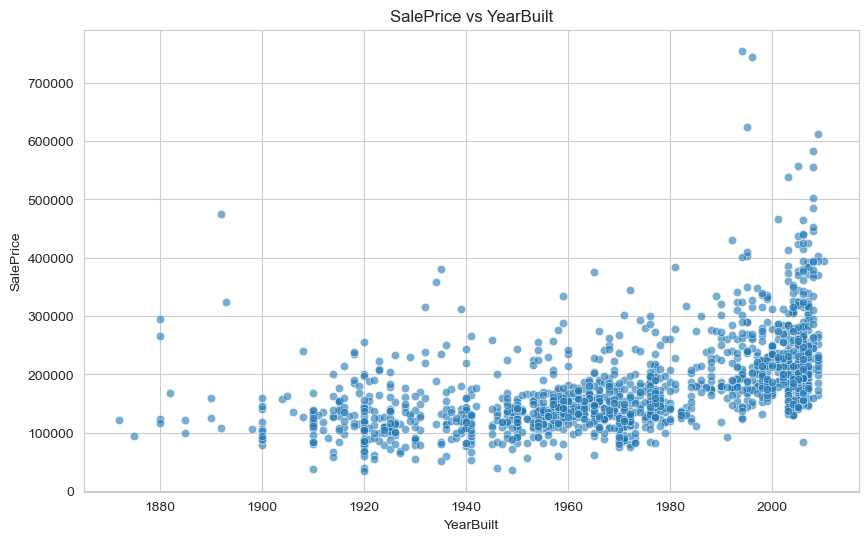

Correlation between YearBuilt and SalePrice: 0.52


In [13]:
# Scatter plot for YearBuilt vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['YearBuilt'], y=train_data['SalePrice'], alpha=0.6)
plt.title('SalePrice vs YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

# Calcul de la corrélation
correlation_yearbuilt_saleprice = train_data['YearBuilt'].corr(train_data['SalePrice'])
print(f"Correlation between YearBuilt and SalePrice: {correlation_yearbuilt_saleprice:.2f}")

#### Hypothèse 4 : La présence d'un garage augmente significativement le prix de vente.

Un garage est souvent considéré comme un atout précieux pour une propriété, offrant un espace de stationnement sécurisé et un espace de stockage supplémentaire.

Nous allons vérifier cette hypothèse en utilisant des box plots pour comparer les prix de vente des maisons avec et sans garage.

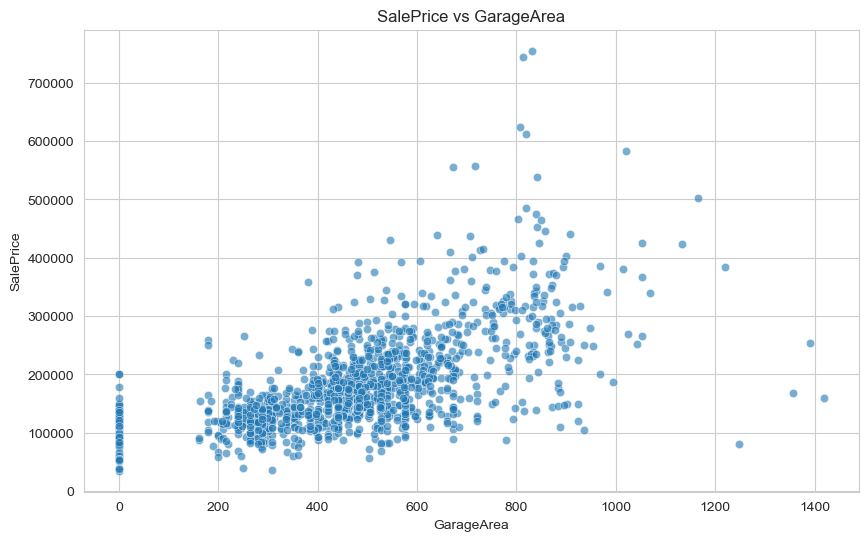

Correlation between GarageArea and SalePrice: 0.62


In [14]:
# Scatter plot for GarageArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['GarageArea'], y=train_data['SalePrice'], alpha=0.6)
plt.title('SalePrice vs GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

# Calcul de la corrélation
correlation_garagearea_saleprice = train_data['GarageArea'].corr(train_data['SalePrice'])
print(f"Correlation between GarageArea and SalePrice: {correlation_garagearea_saleprice:.2f}")

#### Hypothèse 5 : La taille du sous-sol est fortement corrélée au prix de vente.

Dans la région d'Ames, Iowa, qui est sujette aux tornades, les sous-sols peuvent être considérés comme des espaces précieux. Ainsi, il est raisonnable de penser que les propriétés avec des sous-sols plus grands pourraient se vendre à des prix plus élevés.

Nous allons vérifier cette hypothèse en traçant un scatter plot entre la taille du sous-sol et le prix des propriétés.

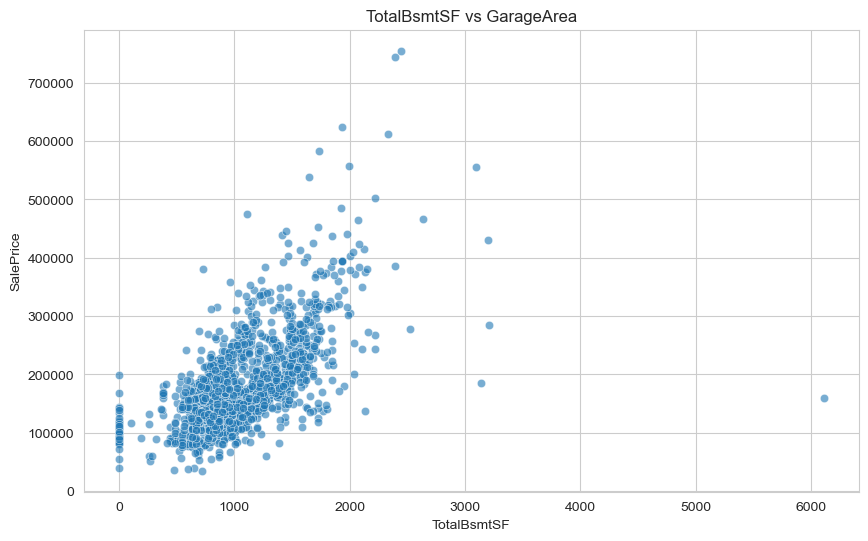

Correlation between TotalBsmtSF and SalePrice: 0.61


In [15]:
# Scatter plot for TotalBsmtSF vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'], alpha=0.6)
plt.title('TotalBsmtSF vs GarageArea')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

# Calcul de la corrélation
correlation_garagearea_saleprice = train_data['TotalBsmtSF'].corr(train_data['SalePrice'])
print(f"Correlation between TotalBsmtSF and SalePrice: {correlation_garagearea_saleprice:.2f}")

## Modèle baseline
**Pourquoi créer un modèle baseline ?**

Le modèle baseline nous servira de point de référence pour comparer les performances de modèles plus complexes. Nous obtiendrons ainsi de précieuses informations sur l'efficacité des modèles.

**Construire un modèle baseline efficace**

- Étape 1 : Traiter et nettoyer les données en nous occupant des valeurs manquantes, des valeurs aberrantes et de l'encodage des variables catégorielles.
- Étape 2 : Sélectionner les caractéristiques étant les plus corrélées à l'objectif (ici le prix).
- Étape 3 : Établir des mesures de performances qui serviront de référence pour mesurer le progrès des mocèles plus complexes.

**Choix pour notre modèle baseline**

- Régression linéaire : Choisi pour sa simplicité.
- Validation croisée : Nous évaluerons notre modèle uniquement sur les données d'entrainement en les divisant en 5 parties.
- Root Mean Squared Logarithmic Error (RMSLE) : Métrique courante pour les problèmes de régression, utilisée pour punir proportionnellement les erreurs.

### Étape 1 : Traiter et nettoyer les données

Dans cette étape, nous allons effectuer des traitements simples pour nettoyer et préparer nos données pour l'analyse et la modélisation. L'objectif est de rendre les données cohérentes et exploitables en traitant les valeurs manquantes de manière pragmatique.

Pour cette étape nous : 
- Créons des groupes pour les colonnes catégoriques et numériques.
- Traitons les valeurs null des colonnes catégoriques en les remplaçant par `NA`.
- Traitons les valeurs null des colonnes numériques en les remplaçant par `0`.

In [16]:
baseline_data = train_data

# Identification des colonnes catégoriques et numériques
baseline_categorical_cols = baseline_data.select_dtypes(include=['object']).columns
baseline_numerical_cols = baseline_data.drop(columns=['SalePrice']).select_dtypes(exclude=['object']).columns

# Définition des imputers pour les données catégoriques et numériques
baseline_categorical_imputer = SimpleImputer(strategy='constant', fill_value='NA')
baseline_numerical_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Application des imputers sur les données d'entraînement
baseline_data[baseline_categorical_cols] = baseline_categorical_imputer.fit_transform(baseline_data[baseline_categorical_cols])
baseline_data[baseline_numerical_cols] = baseline_numerical_imputer.fit_transform(baseline_data[baseline_numerical_cols])

# Vérification qu'il ne reste plus de valeurs manquantes
print("\nMissing Values after imputation in baseline data:", baseline_data.isnull().sum().sum())


Missing Values after imputation in baseline data: 0


### Étape 2 : Sélection des features

Pour cette étape, nous allons identifier les caractéristiques les plus pertinentes pour notre modèle de prédiction des prix. Nous allons le faire en analysant la corrélation entre chaque caractéristique et la variable cible `SalePrice`.

La matrice de corrélation nous aide à comprendre quelles variables ont une relation forte avec notre variable cible. Une corrélation élevée avec SalePrice signifie que la variable peut être un bon prédicteur du prix.

Pour cette étape, nous aurons besoins de : 
- Calculer les matrice de corrélation.
- Extraire les corrélations relatives à la variable `SalePrice`.
- Visualiser les coefficient de corrélation.
- Sélectionner les features au coefficient supérieur à 0.6.

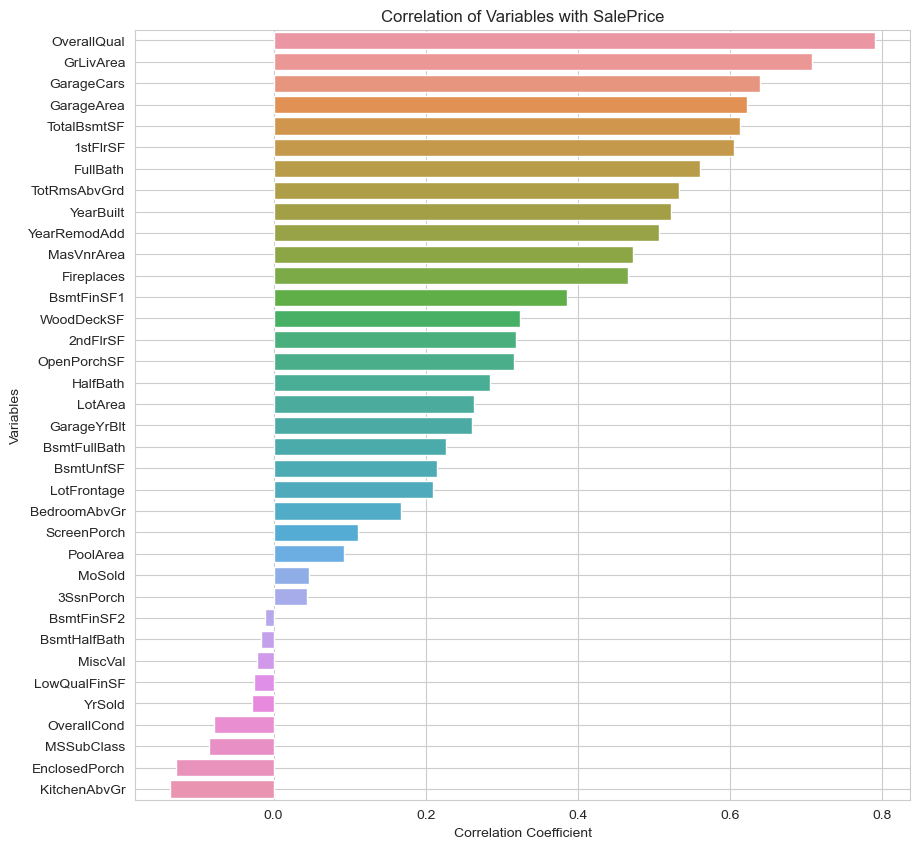

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [17]:
# Calcul de la matrice de corrélation des colonnes numériques
correlation_matrix = baseline_data.corr(numeric_only=True)

# Extraction des corrélations relatives à 'SalePrice'
sale_price_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Exclure SalePrice de la série sale_price_correlations
sale_price_correlations = sale_price_correlations.drop('SalePrice')

# Visualisation des corrélations avec SalePrice
plt.figure(figsize=(10, 10))
sns.barplot(x=sale_price_correlations.values, y=sale_price_correlations.index)
plt.title('Correlation of Variables with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)
plt.show()

sale_price_correlations

In [18]:

# Sélectionner les fonctionnalités ayant un coefficient de corrélation supérieur à 0.6
selected_features = sale_price_correlations[sale_price_correlations > 0.6].index.tolist()

# Afficher les fonctionnalités sélectionnées
print("Features with correlation coefficient > 0.6:\n", selected_features)

Features with correlation coefficient > 0.6:
 ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']


### Étape 3 : Établir le modèle et les mesures de performances

Dans cette étape, nous allons établir notre modèle de prédiction, effectuer une validation croisée pour évaluer ses performances, et calculer les scores moyens. Nous commencerons par un modèle de régression linéaire simple comme baseline pour évaluer les performances de base.

- **Normalisation de la distribution :** Comme nous l'avons vu dans le graphique de distribution, `SalePrice` est fortement asymétrique vers la droite. Une transformation logarithmique permet de normaliser la distribution, la rendant plus symétrique et proche d'une loi normale. Cela peut améliorer les performances des modèles linéaires qui supposent que les erreurs sont normalement distribuées.
- **Réduction de l'impact des valeurs extrêmes :** La transformation logarithmique réduit l'effet des valeurs extrêmes, rendant le modèle plus robuste.
- **Évaluation Robuste :** La validation croisée permet d'évaluer les performances du modèle sur plusieurs sous-ensembles des données, fournissant une estimation plus robuste et plus fiable de la performance du modèle.
- **Réduction du Surapprentissage :** En utilisant plusieurs sous-ensembles pour entraîner et tester le modèle, nous réduisons le risque de surapprentissage (overfitting), où le modèle pourrait bien fonctionner sur les données d'entraînement mais mal sur les nouvelles données.

Pour cette étape nous devons :
- Transformer `SalePrice` en valeur logarithmique.
- Définir le type de modèle à utiliser.
- Faire de la validation croisée.
- Calculer la moyenne des scores.

In [19]:
# Sélection des features
baseline_x = baseline_data[selected_features]

# Transformation logarithmique de la variable cible
baseline_y = np.log1p(baseline_data['SalePrice'])

# Définition du modèle de régression linéaire
model = LinearRegression()

# Validation croisée du modèle
cv_scores = cross_val_score(model, baseline_x, baseline_y, scoring="neg_mean_squared_error", cv=5)

# Conversion de l'erreur quadratique moyenne négative en RMSLE (Root Mean Squared Log Error)
rmsle_cv_scores = np.sqrt(-cv_scores)

# Affichage des scores de validation croisée
print("Scores de validation croisée: ", rmsle_cv_scores)

# Affichage du score moyen
print("Score moyen de validation croisée: ", np.mean(rmsle_cv_scores))

Scores de validation croisée:  [0.16962468 0.19377508 0.17751216 0.16583773 0.21805914]
Score moyen de validation croisée:  0.18496175823100364


# Phase de Design

La phase de design est une étape essentielle dans le développement d'un projet de machine learning. Elle consiste à préparer la pipeline de données, à tester différents modèles et à optimiser les performances du système. Voici les étapes clés de cette phase et pourquoi elles sont importantes :

**Pourquoi la phase de design est importante ?**

- **Préparation de la Pipeline de Données** : Une pipeline de données bien conçue assure que les données sont nettoyées, transformées et prêtes pour être utilisées par les modèles. Cela permet de standardiser et d'automatiser le processus de préparation des données.
  
- **Tests de Différents Modèles** : Essayer différents modèles permet de trouver l'algorithme qui offre les meilleures performances pour notre use case spécifique. Cela inclut l'optimisation des hyperparamètres et la validation des modèles.

**Ce que nous allons faire dans cette phase :**

1. **Data Engineering : Préparation de la Pipeline**
    - **Création de la pipeline de transformation des données** : Nous allons établir une série d'étapes pour transformer les données brutes en un format adapté aux modèles de machine learning. Cela inclut des transformations spécifiques pour les variables catégoriques et numériques.
    - **Traitement des valeurs manquantes** : Les valeurs manquantes dans les données peuvent biaiser les résultats des modèles. Nous allons donc imputer ces valeurs avec des stratégies appropriées, comme la moyenne pour les variables numériques et une valeur constante pour les variables catégoriques.
    - **Encodage des variables catégoriques** : Les modèles de machine learning ne peuvent pas traiter directement les données catégoriques. Nous allons donc convertir ces variables en un format numérique, souvent en utilisant des techniques comme l'encodage one-hot.
    - **Standardisation ou normalisation des variables numériques** : Les variables numériques peuvent avoir des échelles différentes, ce qui peut affecter les performances des modèles. Nous allons standardiser ou normaliser ces variables pour les rendre comparables.

2. **Model Engineering : Tests de Différents Modèles**
    - **Sélection de modèles divers** : Nous allons tester plusieurs types de modèles, notamment la Ridge Regression, la Lasso Regression, la Decision Tree Regression, le Gradient Boosting avec XGBoost et le Gradient Boosting avec CatBoost. Chaque modèle a ses propres forces et faiblesses, et il est important de déterminer lequel est le mieux adapté à nos données.
    - **Validation croisée** : Pour évaluer de manière fiable les performances des modèles, nous allons utiliser des techniques de validation croisée. Cela implique de diviser les données en plusieurs sous-ensembles et d'entraîner/tester le modèle plusieurs fois pour obtenir une estimation robuste de ses performances.
    - **Optimisation des hyperparamètres** : Chaque modèle a des paramètres spécifiques qui peuvent être ajustés pour améliorer ses performances. Nous allons utiliser la librairie Optuna pour trouver les meilleures combinaisons de ces paramètres.
    - **Évaluation des performances** : Nous allons comparer les performances des modèles en utilisant des métriques appropriées, notamment la racine carrée de l'erreur quadratique logarithmique moyenne (RMSLE) pour les tâches de régression. Le modèle avec les meilleures performances globales sera sélectionné pour la phase suivante.

## Data Engineering

L'objectif de cette section est de préparer une pipeline Scikit-learn afin de traiter les données des datasets `train` et `test`. La pipeline doit être capable de `fit()` sur le dataset `train.csv` et `transform()` sur le dataset `test.csv`.

**Pourquoi une pipeline de données est-elle nécessaire ?**

- **Automatisation** : La pipeline permet d'automatiser le processus de préparation des données, ce qui réduit les erreurs manuelles et augmente l'efficacité.
- **Reproductibilité** : Une pipeline garantit que les mêmes transformations sont appliquées de manière cohérente aux données d'entraînement et de test, assurant ainsi la reproductibilité des résultats.
- **Gestion des transformations complexes** : Elle permet de gérer facilement des transformations complexes et de les enchaîner de manière logique.

**Étapes de la préparation de la pipeline :**

1. **Identification des Types de Données** :
   - **Colonnes numériques**
   - **Colonnes catégoriques** : Dissocier les colonne catégoriques ordinales et nominales.

2. **Traitement des Valeurs Manquantes** :
   - **Colonnes numériques** : Remplacer les valeurs manquantes par `0`.
   - **Colonnes catégoriques** : Remplacer les valeurs manquantes par une valeur constante `NA` indiquant l'absence d'information.

3. **Encodage des Variables Catégoriques** :
   - Utiliser l'encodage One-Hot pour convertir les variables catégoriques nominales en variables numériques.
   - Utiliser l'encodage Ordinal pour les variables catégoriques ordinales.

4. **Standardisation ou Normalisation des Données** :
   - **Colonnes numériques** : Standardiser les valeurs pour qu'elles aient une moyenne de 0 et un écart-type de 1, afin de rendre les variables comparables entre elles.

### Préparation de la pipeline


In [20]:
# Identifier les colonnes catégoriques et numériques
categorical_cols = train_data.select_dtypes(include=['object']).columns
numerical_cols = train_data.drop(columns=['SalePrice']).select_dtypes(exclude=['object']).columns

# Définir les colonnes numériques, ordinales et nominales
numerical_cols = [col for col in numerical_cols if col not in ['MSSubClass', 'OverallQual', 'OverallCond']]
ordinal_cols = [
    'LotShape', 'LandContour', 'LandSlope', 'Utilities', 'OverallQual', 'OverallCond', 
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'
]
nominal_cols = [col for col in categorical_cols if col not in ordinal_cols]
nominal_cols.append('MSSubClass')

# Définir les catégories spécifiques pour les colonnes ordinales
ordinal_categories = [
    ['Reg', 'IR1', 'IR2', 'IR3'],  # LotShape
    ['Lvl', 'Bnk', 'HLS', 'Low'],  # LandContour
    ['Gtl', 'Mod', 'Sev'],  # LandSlope
    ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],  # Utilities
    list(range(1, 11)),  # OverallQual
    list(range(1, 11)),  # OverallCond
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterCond
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtQual
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtCond
    ['NA', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # HeatingQC
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # KitchenQual
    ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Functional
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # FireplaceQu
    ['NA', 'Unf', 'RFn', 'Fin'],  # GarageFinish
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageQual
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageCond
    ['N', 'P', 'Y'],  # PavedDrive
    ['NA', 'Fa', 'TA', 'Gd', 'Ex'],  # PoolQC
    ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']  # Fence
]

# Imputer spécifique pour les colonnes catégoriques et numériques
categorical_imputer = SimpleImputer(strategy='constant', fill_value='NA')
numerical_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Définir les étapes de transformation pour les colonnes nominales
nominal_transformer = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Définir les étapes de transformation pour les colonnes ordinales avec les catégories spécifiques
ordinal_transformer = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('ordinal', OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1))
])

# Définir les étapes de transformation pour les colonnes numériques
numerical_transformer = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', StandardScaler())
])

# Combinaison des transformateurs en utilisant ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('nom', nominal_transformer, nominal_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ])

# Création de la pipeline de prétraitement complète
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Application de la pipeline sur les données d'entraînement
pipeline.fit(train_data.drop(columns=['SalePrice']))

# Fonction pour obtenir les noms des features après transformation
def get_feature_names(preprocessor, numerical_cols, nominal_cols, ordinal_cols):
    """

    :rtype: object
    """
    # Noms des features numériques
    num_features = numerical_cols
    
    # Noms des features nominales après OneHotEncoding
    nominal_features = list(preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(nominal_cols))
    
    # Noms des features ordinales
    ord_features = ordinal_cols
    
    # Combiner tous les noms de features
    all_features = num_features + nominal_features + ord_features
    
    return all_features

# Obtenir les noms des features après transformation
feature_names = get_feature_names(preprocessor, numerical_cols, nominal_cols, ordinal_cols)

# Transformation des données d'entraînement et de test
train_x = pipeline.transform(train_data.drop(columns=['SalePrice']))
train_y = np.log1p(train_data['SalePrice'])
test_x = pipeline.transform(test_data)

## Model Engineering

Dans cette section, nous allons explorer cinq modèles de régression différents pour prédire les prix des propriétés immobilières. Pour chaque modèle, nous utiliserons la bibliothèque Optuna pour l'optimisation des hyperparamètres et nous appliquerons le modèle à notre pipeline de traitement des données. Ensuite, nous utiliserons SHAP pour la visualisation et l'interprétation des résultats de chaque modèle. Les modèles choisis sont :

1. **Ridge Regression**
2. **Lasso Regression**
3. **Decision Tree Regressor**
4. **Gradient Boosting avec XGBoost**
5. **Gradient Boosting avec CatBoost**

#### Visualisation et interprétation des résultats

Pour interpréter les résultats obtenu nous allons sur chacun de nos modèles afficher 3 graphiques différents :

- **Visualisation des résidus :**
    La distribution des résidus nous aide à comprendre à quel point les prédictions de notre modèle sont proches des valeurs réelles. Les résidus sont calculés comme la différence entre les prix réels des maisons et les prix prédits par notre modèle Ridge.

- **Prédictions vs valeurs réelles :**
    Cette visualisation compare les prix prédits par notre modèle aux prix de vente réels des maisons. Cela nous permet de visualiser l'exactitude des prédictions sur l'ensemble des données.

- **SHAP Values - Importance des caractéristiques :**
    Les valeurs SHAP (SHapley Additive exPlanations) offrent une vue profonde sur la contribution de chaque caractéristique à la prédiction de chaque maison. Ce type d'analyse peut révéler les facteurs les plus importants qui affectent les prix des maisons.

#### Conclusion

Les visualisations fournissent des insights précieux sur la performance et le comportement de notre modèle Ridge. L'analyse des résidus et des prédictions vs réalités offre une assurance que le modèle prédit avec une précision acceptable, tandis que l'analyse SHAP met en lumière les caractéristiques les plus influentes. Ces analyses nous permettent non seulement de valider la robustesse de notre modèle mais aussi d'identifier des pistes pour des améliorations continues.

### Ridge Regression
La Ridge Regression est une variante de la régression linéaire qui ajoute une pénalité de norme L2 aux coefficients de régression. Cette pénalité aide à réduire le surapprentissage (overfitting) en réduisant la complexité du modèle, ce qui peut améliorer les performances sur des ensembles de données de grande dimension.

**Pourquoi c'est intéressant**

- Réduction de l'overfitting : La pénalité L2 aide à réduire le surapprentissage en contraignant les coefficients du modèle.
- Stabilité : Elle rend le modèle plus stable en présence de multicolinéarité.
- Simplicité et Interprétabilité : Malgré l'ajout de la pénalité, le modèle reste simple et interprétable, similaire à la régression linéaire.

**Optimisation des hyperparamètres avec Optuna**

Dans le cas de la Ridge Regression, nous allons optimiser l'hyperparamètre `alpha`, qui contrôle la force de la pénalisation.

[I 2024-06-21 12:13:39,129] A new study created in memory with name: no-name-364c2c20-1b6e-4fe6-a95e-05bc9042bb34
[I 2024-06-21 12:13:39,191] Trial 0 finished with value: 0.00012124612372351598 and parameters: {'alpha': 0.4972686793072652}. Best is trial 0 with value: 0.00012124612372351598.
[I 2024-06-21 12:13:39,250] Trial 1 finished with value: 0.00012180731270904745 and parameters: {'alpha': 0.45517903991992803}. Best is trial 0 with value: 0.00012124612372351598.
[I 2024-06-21 12:13:39,305] Trial 2 finished with value: 0.00011618166496506879 and parameters: {'alpha': 1.2838216826651643}. Best is trial 2 with value: 0.00011618166496506879.
[I 2024-06-21 12:13:39,375] Trial 3 finished with value: 0.00013817859215697464 and parameters: {'alpha': 0.0018866926592063333}. Best is trial 2 with value: 0.00011618166496506879.
[I 2024-06-21 12:13:39,435] Trial 4 finished with value: 0.00011208679978325748 and parameters: {'alpha': 7.569272592214371}. Best is trial 4 with value: 0.0001120867

Best alpha: 10.110478728700137
RMSLE: 0.11288392304874101


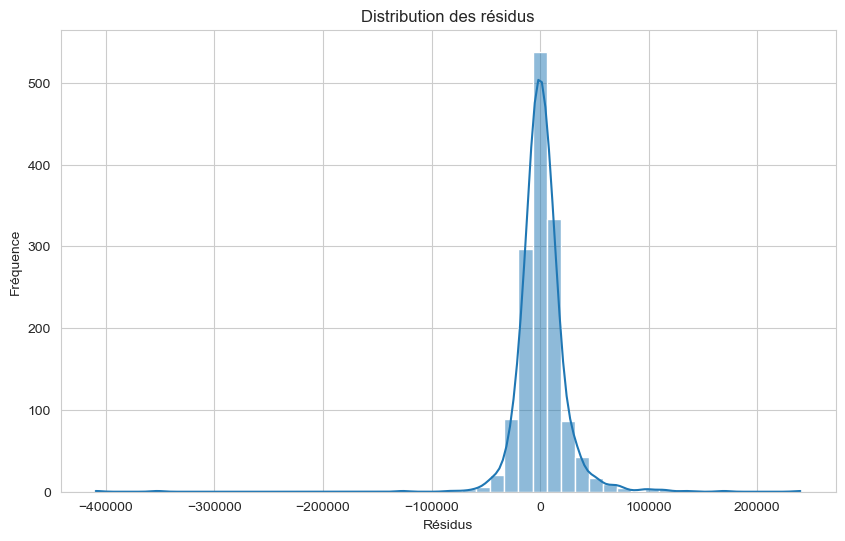

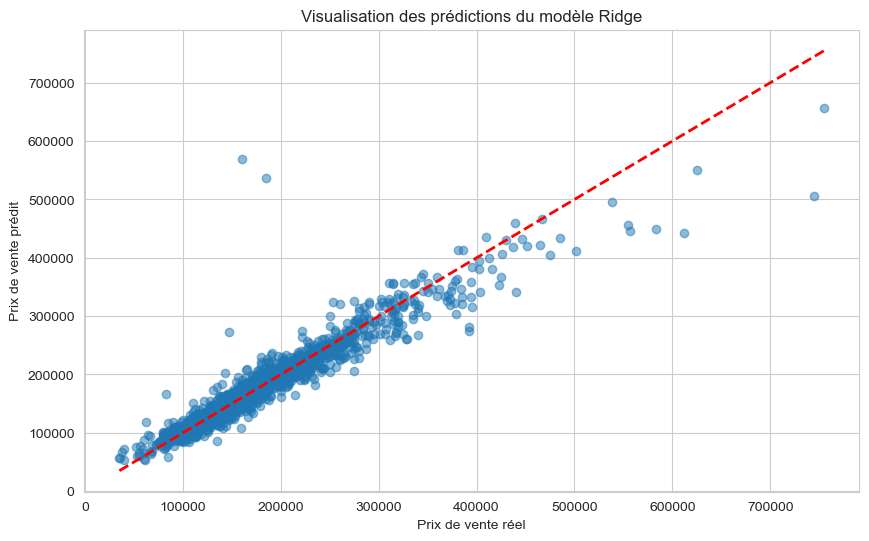

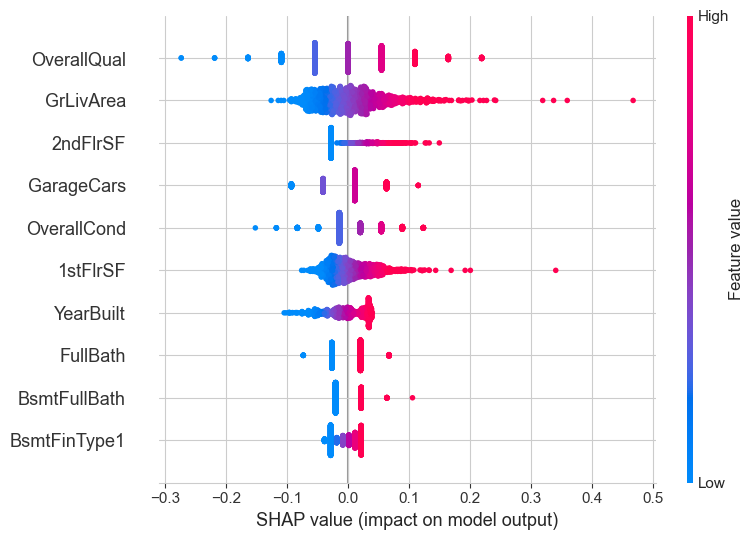

In [21]:
def objective_ridge(trial):
    alpha = trial.suggest_float('alpha', 1e-3, 100.0, log=True)
    ridge = Ridge(alpha=alpha)
    score = cross_val_score(ridge, train_x, train_y, cv=5, scoring='neg_mean_squared_log_error')
    return -score.mean()

# Créer une étude Optuna pour minimiser la fonction objectif
study_ridge = optuna.create_study(direction='minimize')
study_ridge.optimize(objective_ridge, n_trials=100)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Best alpha: {study_ridge.best_params['alpha']}")

# Définir le meilleur modèle Ridge avec les hyperparamètres optimisés
best_ridge = Ridge(alpha=study_ridge.best_params['alpha'])

# Entraîner le modèle sur les données d'entraînement préparées
best_ridge.fit(train_x, train_y)

# Utiliser le modèle entraîné pour faire des prédictions
predictions_log = best_ridge.predict(train_x)

# Convertir les prédictions logarithmiques en échelle normale
predictions = np.expm1(predictions_log)

# Calculer le RMSLE sur les prédictions
rmsle = np.sqrt(mean_squared_log_error(train_data['SalePrice'], predictions))
print(f"RMSLE: {rmsle}")

# Visualisation des résidus
residuals = np.expm1(train_y) - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(train_data['SalePrice'], predictions, alpha=0.5)
plt.plot([train_data['SalePrice'].min(), train_data['SalePrice'].max()],
         [train_data['SalePrice'].min(), train_data['SalePrice'].max()],
         'r--', lw=2)
plt.xlabel('Prix de vente réel')
plt.ylabel('Prix de vente prédit')
plt.title('Visualisation des prédictions du modèle Ridge')
plt.show()

# SHAP values
explainer = shap.Explainer(best_ridge, train_x)
shap_values = explainer(train_x)

# Visualisation
shap.summary_plot(shap_values, train_x, feature_names, max_display=10)

#### Interprétation des visualisations du modèle Ridge

**Visualisation des résidus**
- **Interprétation** : 
    - La distribution des résidus est centrée autour de zéro, ce qui est un indicateur que le modèle n'introduit pas de biais significatif dans les prédictions.
    - La forme de la distribution est approximativement normale avec une pointe très marquée autour de zéro, indiquant que la majorité des prédictions sont très proches des valeurs réelles.
    - Les queues fines de la distribution montrent que des erreurs significatives sont relativement rares, ce qui suggère que le modèle performe bien pour la plupart des prédictions, mais il pourrait y avoir quelques cas où le modèle ne parvient pas à capturer correctement la dynamique des prix.

**Prédictions vs valeurs réelles**
- **Interprétation** : 
    - La majorité des points tombent près de la ligne rouge en pointillés, qui représente la perfection dans la prédiction (où les valeurs prédites sont égales aux valeurs réelles).
    - Cette proximité à la ligne indique que le modèle Ridge prédit avec une bonne exactitude sur un large éventail de prix.
    - Cependant, quelques points sont dispersés loin de la ligne, particulièrement dans les gammes de prix élevées, suggérant que le modèle pourrait être amélioré pour mieux prédire les maisons de valeur très élevée ou très basse.

**SHAP Values - Importance des caractéristiques**
- **Interprétation** : 
    - Les caractéristiques telles que OverallQual (qualité globale de la maison) et GrLivArea (surface habitable au-dessus du sol) ont un impact positif significatif sur les prédictions de prix, comme illustré par les points étendus vers la droite. Cela indique que des améliorations dans ces aspects de la propriété sont associées à des augmentations de prix.
    - D'autres caractéristiques comme BsmtFinType1 (type de finition du sous-sol) ont une influence plus mixte ou neutre, ce qui peut suggérer une variabilité dans la façon dont ces caractéristiques affectent les prix dans différents contextes.
    - La barre de couleur à droite montre que les caractéristiques avec des valeurs plus élevées (en rouge) tendent à augmenter le prix prévu, alors que celles avec des valeurs plus basses (en bleu) ont un impact négatif.

### Lasso Regression
La Lasso Regression (Least Absolute Shrinkage and Selection Operator) est une variante de la régression linéaire qui ajoute une pénalité de norme L1 aux coefficients de régression. Cette pénalité peut conduire à des coefficients de régression exactement nuls, ce qui permet de sélectionner les variables les plus importantes.

**Pourquoi c'est intéressant**

- Sélection des Variables : La pénalité L1 permet d'effectuer une sélection automatique des variables en contraignant certains coefficients à être exactement égaux à zéro.
- Réduction de l'overfitting : La pénalité L1 aide à réduire le surapprentissage en contraignant les coefficients du modèle.
- Simplicité et Interprétabilité : Comme la Ridge Regression, le modèle reste simple et interprétable, mais avec l'avantage supplémentaire de la sélection de caractéristiques.

**Optimisation des hyperparamètres avec Optuna**

Dans le cas de la Lasso Regression, nous allons optimiser l'hyperparamètre `alpha`, qui contrôle la force de la pénalisation.

[I 2024-06-21 12:21:03,085] A new study created in memory with name: no-name-2a56623e-839d-4560-9506-33cb80454955
[I 2024-06-21 12:21:03,142] Trial 0 finished with value: 0.0009406924517435633 and parameters: {'alpha': 4.241353835724047}. Best is trial 0 with value: 0.0009406924517435633.
[I 2024-06-21 12:21:03,193] Trial 1 finished with value: 0.0006940252281600647 and parameters: {'alpha': 0.3507494268221736}. Best is trial 1 with value: 0.0006940252281600647.
[I 2024-06-21 12:21:03,251] Trial 2 finished with value: 0.0009406924517435633 and parameters: {'alpha': 6.110553529745678}. Best is trial 1 with value: 0.0006940252281600647.
[I 2024-06-21 12:21:03,343] Trial 3 finished with value: 0.00012180645079710988 and parameters: {'alpha': 0.0022685542311450257}. Best is trial 3 with value: 0.00012180645079710988.
[I 2024-06-21 12:21:03,473] Trial 4 finished with value: 0.00011316681259483756 and parameters: {'alpha': 0.0013886763679447742}. Best is trial 4 with value: 0.000113166812594

Best alpha: 0.0010004083284104323
RMSLE: 0.12009931540750969


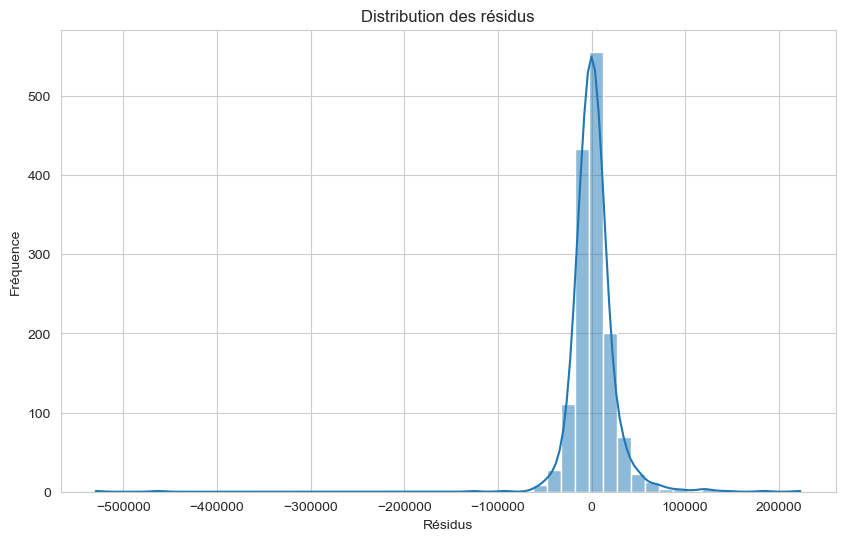

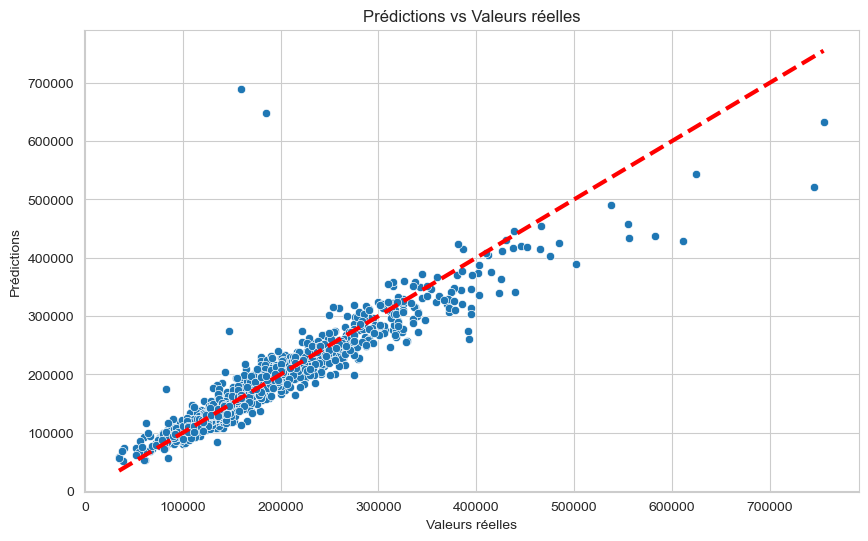

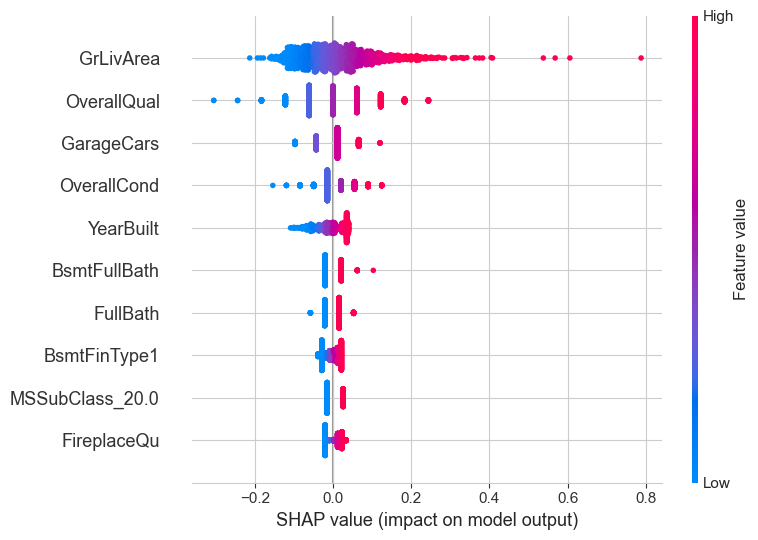

In [26]:
# Définition de la fonction objectif pour Optuna
def objective_lasso(trial):
    alpha = trial.suggest_float('alpha', 1e-3, 100.0, log=True)
    lasso = Lasso(alpha=alpha)
    score = cross_val_score(lasso, train_x, train_y, cv=5, scoring='neg_mean_squared_log_error')
    return -score.mean()

# Créer une étude Optuna pour minimiser la fonction objectif
study_lasso = optuna.create_study(direction='minimize')
study_lasso.optimize(objective_lasso, n_trials=100)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Best alpha: {study_lasso.best_params['alpha']}")

# Définir le meilleur modèle Lasso avec les hyperparamètres optimisés
best_lasso = Lasso(alpha=study_lasso.best_params['alpha'])

# Entraîner le modèle sur les données d'entraînement préparées
best_lasso.fit(train_x, train_y)

# Utiliser le modèle entraîné pour faire des prédictions
predictions_log = best_lasso.predict(train_x)

# Convertir les prédictions logarithmiques en échelle normale
predictions = np.expm1(predictions_log)

# Calculer le RMSLE sur les prédictions
rmsle = np.sqrt(mean_squared_log_error(train_data['SalePrice'], predictions))
print(f"RMSLE: {rmsle}")

# Préparation pour la visualisation des coefficients (pas sur de ce code)
#lphas = np.logspace(-3, 2, 100)  # Création d'une échelle logarithmique pour alpha
#coefs = []
#for a in alphas:
#    lasso = Lasso(alpha=a)
#    lasso.fit(train_x, train_y)
#    coefs.append(lasso.coef_)

# Visualisation des coefficients en fonction de la régularisation
#plt.figure(figsize=(10, 6))
#plt.plot(alphas, coefs)
#plt.xscale('log')
#plt.xlabel('alpha')
#plt.ylabel('coefficients')
#plt.title('Lasso coefficients as a function of the regularization')
#plt.axis('tight')
#plt.show()

# Visualisation des résidus
residuals = train_data['SalePrice'] - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['SalePrice'], y=predictions)
plt.plot([train_data['SalePrice'].min(), train_data['SalePrice'].max()],
         [train_data['SalePrice'].min(), train_data['SalePrice'].max()],
         'r--', lw=3)
plt.title('Prédictions vs Valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.show()

# SHAP values
explainer = shap.Explainer(best_lasso, train_x)
shap_values = explainer(train_x)

# Visualisation
shap.summary_plot(shap_values, train_x, feature_names, max_display=10)

#### Interprétation des visualisations du modèle lasso regression

**Visualisation des résidus**

- **Interprétation** :
    - La symétrie de la distribution autour de zéro suggère que le modèle ne souffre pas d'un biais significatif vers des prédictions systématiquement trop élevées ou trop basses.
    - La forme étroite de la distribution indique une bonne précision du modèle, avec la plupart des erreurs de prédiction relativement faibles.
    - la distribution des résidus du modèle Ridge est généralement plus pointue et plus centrée autour de zéro comparée à celle du Lasso, ce qui suggère que le Ridge pourrait avoir une précision légèrement supérieure et une meilleure consistance dans les prédictions pour cet ensemble de données.

**Prédictions vs valeurs réelles**

- **Interprétation** : 
    - Les points sont majoritairement alignés le long de la ligne rouge, ce qui démontre que les prédictions sont généralement précises et proches des valeurs réelles.
    - Bien que la plupart des prédictions soient proches de la perfection, quelques points éloignés de la ligne rouge indiquent des erreurs plus importantes. Cela pourrait signaler des cas particuliers où le modèle pourrait être amélioré ou ajusté.
    - L'alignement global des points le long de la ligne rouge souligne l'efficacité du modèle Lasso dans la prédiction des prix des maisons sur cet ensemble de données.
    - le modèle Ridge semble avoir une meilleure alignement des points le long de la ligne idéale que le modèle Lasso. Cela peut indiquer que le modèle Ridge gère mieux les extrêmes et offre une précision globalement supérieure, surtout sur les valeurs élevées et basses des maisons.

**SHAP Values - Importance des caractéristiques**

- **Interprétation** : 
    - Les caractéristiques telles que GrLivArea (surface habitable au-dessus du sol) et OverallQual (qualité globale de la maison) montrent un impact positif considérable sur les prédictions, comme indiqué par les valeurs SHAP se déplaçant vers la droite.
    - YearBuilt (année de construction) et GarageCars (nombre de places de garage) montrent également une influence significative sur la valeur des maisons, suggérant que les maisons plus récentes ou avec plus de capacité de garage tendent à être évaluées plus cher.
    - Les couleurs des points indiquent l'intensité de la caractéristique (bleu pour bas, rouge pour haut), aidant à visualiser comment les variations dans ces caractéristiques affectent les prix des maisons.
    - Les valeurs SHAP pour les modèles Lasso et Ridge montrent que des caractéristiques comme OverallQual et GrLivArea sont importantes dans les deux cas. Cependant, le modèle Lasso tend à avoir des impacts plus "étendus" et moins distincts entre les caractéristiques comparativement au Ridge, ce qui peut indiquer une distinction moins claire dans l'importance relative des caractéristiques dans le modèle Lasso.

### Decision Tree Regressor

Le Decision Tree Regressor est un modèle non linéaire qui partitionne l'espace des caractéristiques en régions homogènes en fonction de la variable cible. Chaque nœud interne de l'arbre représente une décision basée sur une seule caractéristique, et chaque feuille représente une valeur de prédiction.

**Pourquoi c'est intéressant**

- Simplicité et Interprétabilité : Les arbres de décision sont faciles à interpréter et à visualiser.
- Capture des Relations Non Linéaires : Les arbres de décision peuvent capturer des interactions complexes entre les caractéristiques sans nécessiter de transformation explicite des données.
- Pas de Prérequis pour la Normalisation : Les arbres de décision ne nécessitent pas que les caractéristiques soient normalisées ou standardisées.

**Optimisation des hyperparamètres avec Optuna**

Dans le cas du Decision Tree Regressor, nous allons optimiser les hyperparamètres :

- Profondeur maximale : `max_depth`
- Nombre minimum d'échantillons pour la division : `min_samples_split`
- Nombre minimum d'échantillons pour les feuilles : `min_samples_leaf`

L'optimisation des hyperparamètres pour des modèles comme les arbres de décision nécessite un grand nombre d'essais. Cela est dû à la complexité du modèle, à la sensibilité aux variations dans les données et à l'espace de recherche large des hyperparamètres.

[I 2024-06-21 12:24:07,945] A new study created in memory with name: no-name-5af775a3-2cb9-473b-9fb2-e88ec2aeba08
[I 2024-06-21 12:24:07,989] Trial 0 finished with value: 0.0005114028801920213 and parameters: {'max_depth': 1, 'min_samples_split': 16, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.0005114028801920213.
[I 2024-06-21 12:24:08,248] Trial 1 finished with value: 0.00023058126775541682 and parameters: {'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.00023058126775541682.
[I 2024-06-21 12:24:08,396] Trial 2 finished with value: 0.0002127298458542736 and parameters: {'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 16}. Best is trial 2 with value: 0.0002127298458542736.
[I 2024-06-21 12:24:08,531] Trial 3 finished with value: 0.00021305443347044233 and parameters: {'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 14}. Best is trial 2 with value: 0.0002127298458542736.
[I 2024-06-21 12:24:08,663] Tria

Best max_depth: 17
Best min_samples_split: 15
Best min_samples_leaf: 9
RMSLE: 0.12395104979835155


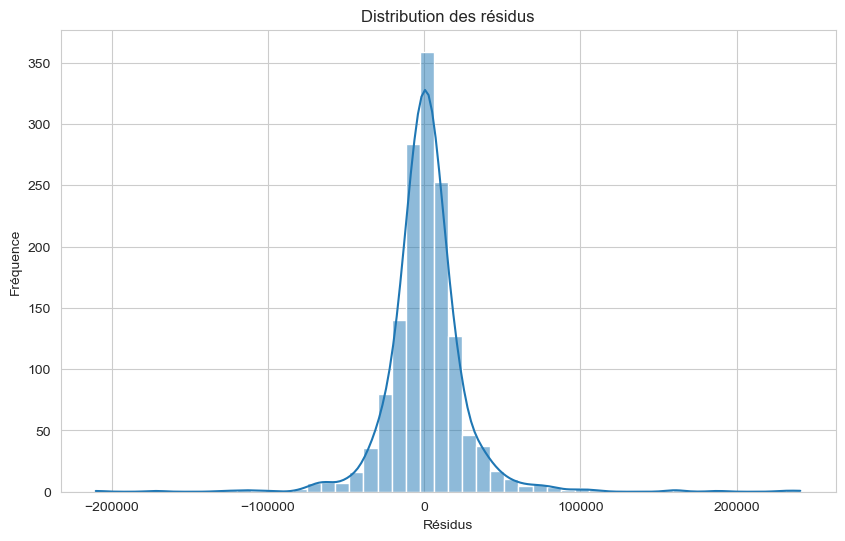

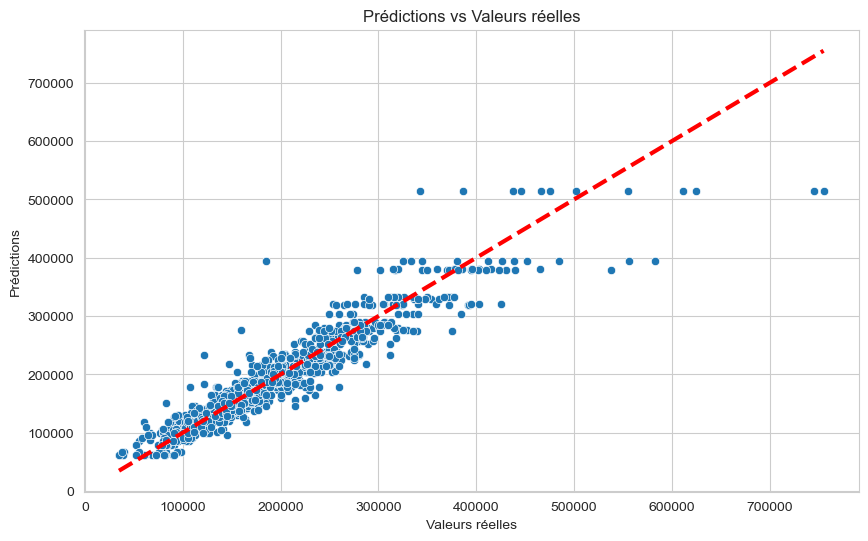

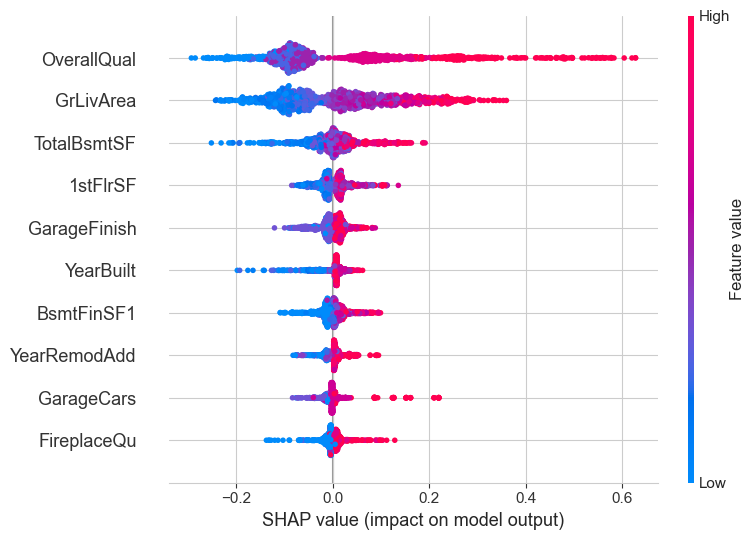

In [28]:
# Fonction objectif pour Optuna
def objective_dtree(trial):
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    dcr = DecisionTreeRegressor(max_depth=max_depth, 
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf)
    
    
    score = cross_val_score(dcr, train_x, train_y, cv=5, scoring='neg_mean_squared_log_error')
    return -score.mean()

# Créer une étude Optuna pour minimiser la fonction objectif
study_dtree = optuna.create_study(direction='minimize')
study_dtree.optimize(objective_dtree, n_trials=250)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Best max_depth: {study_dtree.best_params['max_depth']}")
print(f"Best min_samples_split: {study_dtree.best_params['min_samples_split']}")
print(f"Best min_samples_leaf: {study_dtree.best_params['min_samples_leaf']}")

# Définir le meilleur modèle Decision Tree avec les hyperparamètres optimisés
best_dtree = DecisionTreeRegressor(max_depth=study_dtree.best_params['max_depth'], 
                                   min_samples_split=study_dtree.best_params['min_samples_split'],
                                   min_samples_leaf=study_dtree.best_params['min_samples_leaf'])

# Entraîner le modèle sur les données d'entraînement préparées
best_dtree.fit(train_x, train_y)

# Utiliser le modèle entraîné pour faire des prédictions
predictions_log = best_dtree.predict(train_x)

# Convertir les prédictions logarithmiques en échelle normale
predictions = np.expm1(predictions_log)

# Calculer le RMSLE sur les prédictions
rmsle = np.sqrt(mean_squared_log_error(np.expm1(train_y), predictions))
print(f"RMSLE: {rmsle}")

# Visualisation des résidus
residuals = np.expm1(train_y) - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.expm1(train_y), y=predictions)
plt.plot([np.expm1(train_y).min(), np.expm1(train_y).max()],
         [np.expm1(train_y).min(), np.expm1(train_y).max()],
         'r--', lw=3)
plt.title('Prédictions vs Valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.show()

# SHAP values
explainer = shap.Explainer(best_dtree, train_x)
shap_values = explainer(train_x)

# Visualisation
shap.summary_plot(shap_values, train_x, feature_names, max_display=10)

#### Interprétation des visualisations du modèle decision tree regressor

**Visualisation des résidus**

- **Interprétation** : 
    - La distribution des résidus est centrée autour de zéro, indiquant que la majorité des prédictions sont proches des valeurs réelles.
    - La forme de la distribution est symétrique et pointue autour de zéro, suggérant que le modèle prédit avec précision pour la plupart des observations.
    - Toutefois, la présence de quelques résidus extrêmes, bien que rares, indique des cas où le modèle échoue à capturer avec précision les valeurs réelles, possiblement dans des situations de forte non-linéarité ou d'extrêmes.
    - Le decision tree regressor présente une queue plus lourde comparée aux distributions du Lasso et du Ridge. Cela peut indiquer que, bien que le Decision Tree performe bien pour la majorité des prédictions, il est plus susceptible d'avoir quelques prédictions très inexactes par rapport aux modèles de régression linéaire.

**Prédictions vs valeurs réelles**

- **Interprétation** : 
    - Les points sont majoritairement alignés le long de la ligne rouge, ce qui démontre que les prédictions sont généralement précises et proches des valeurs réelles.
    - La forte concentration des points autour de la ligne indique que le modèle est efficace pour prédire une large gamme de prix des maisons.
    - Les quelques points éloignés de la ligne rouge signalent des erreurs plus importantes, possiblement dues à des caractéristiques uniques des maisons non bien capturées par le modèle.
    - Le Decision Tree Regressor montre une dispersion des points plus grande que celle observée pour le Lasso et le Ridge, suggérant que le Decision Tree pourrait ne pas être aussi précis dans ses prédictions, notamment avec des valeurs plus extrêmes. Cela pourrait être dû à la nature même des arbres de décision, qui peuvent être sujets à un surajustement et moins généralisables.

**SHAP Values - Importance des caractéristiques**

- **Interprétation** : 
    - Les caractéristiques telles que OverallQual (qualité globale), GrLivArea (surface habitable) et TotalBsmntSF (surface totale du sous-sol) ont un impact positif significatif sur les prédictions de prix, comme illustré par les valeurs SHAP se projetant vers la droite.
    - YearBuilt (année de construction) et YearRemodAdd (année de rénovation) influencent également positivement les prédictions, reflétant l'importance de la modernité et de l'état récent des propriétés dans la détermination des prix.
    - La variation dans la contribution des caractéristiques (indiquée par la dispersion des points le long de l'axe horizontal) souligne la complexité des interactions entre caractéristiques et leur influence non uniforme sur le prix des maisons.
    - Comparé aux modèles Lasso et Ridge, le Decision Tree Regressor montre une variation beaucoup plus grande dans les impacts des caractéristiques, avec certains facteurs montrant des effets nettement plus significatifs ou négatifs. Cela pourrait refléter la nature des modèles basés sur les arbres, qui capturent des interactions non linéaires et complexes entre caractéristiques que les modèles linéaires ne détectent pas aussi clairement.

### Gradient Boosting avec XGBoost

XGBoost (Extreme Gradient Boosting) est une implémentation optimisée de l'algorithme de boosting par gradient. Il est conçu pour être très efficace, flexible et portable. XGBoost utilise des arbres de décision comme apprenants faibles et les combine de manière additive pour corriger les erreurs des prédictions précédentes.

**Pourquoi c'est intéressant**

- Performance : XGBoost est l'un des algorithmes de machine learning les plus performants, souvent utilisé dans les compétitions Kaggle en raison de sa capacité à produire des modèles de haute précision.
- Efficacité : XGBoost est conçu pour être rapide et efficace grâce à l'optimisation des calculs et à la prise en charge du parallélisme.
- Flexibilité : Il offre de nombreuses options pour la régularisation, le contrôle de la complexité des modèles, et la gestion des données manquantes.
- Robustesse : XGBoost intègre des mécanismes de régularisation qui aident à éviter le surapprentissage (overfitting).

**Optimisation des hyperparamètres avec Optuna**

Pour XGBoost, nous allons optimiser plusieurs hyperparamètres clés, notamment `n_estimators`, `max_depth`, `learning_rate`, `subsample`, et `colsample_bytree`.

[I 2024-06-21 12:24:55,960] A new study created in memory with name: no-name-4749219a-c402-4d7c-9f6c-f813441cf0ad
[I 2024-06-21 12:24:59,457] Trial 0 finished with value: 0.00011040516891473056 and parameters: {'n_estimators': 167, 'max_depth': 8, 'learning_rate': 0.17023813804510654, 'subsample': 0.9399103384315335, 'colsample_bytree': 0.9747217942887845, 'min_child_weight': 6}. Best is trial 0 with value: 0.00011040516891473056.
[I 2024-06-21 12:25:04,373] Trial 1 finished with value: 0.0001179725957366309 and parameters: {'n_estimators': 280, 'max_depth': 7, 'learning_rate': 0.2256324894253451, 'subsample': 0.6603208903008624, 'colsample_bytree': 0.5085420011346496, 'min_child_weight': 5}. Best is trial 0 with value: 0.00011040516891473056.
[I 2024-06-21 12:25:10,700] Trial 2 finished with value: 0.00011893907854565579 and parameters: {'n_estimators': 746, 'max_depth': 8, 'learning_rate': 0.2401960480766903, 'subsample': 0.7522250961920176, 'colsample_bytree': 0.8490667190023209, 'm

Best params: {'n_estimators': 377, 'max_depth': 4, 'learning_rate': 0.08478734258354664, 'subsample': 0.6168840907500707, 'colsample_bytree': 0.5668910153344078, 'min_child_weight': 3}
RMSLE: 0.1282150207093315


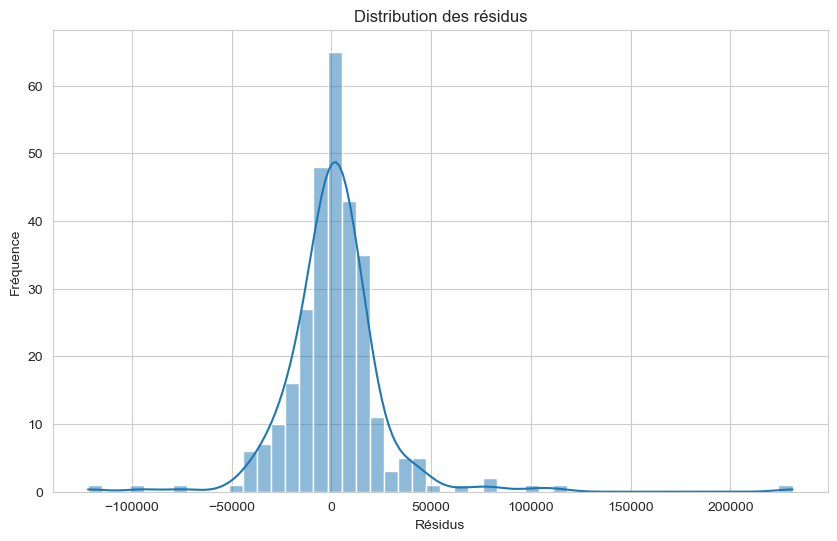

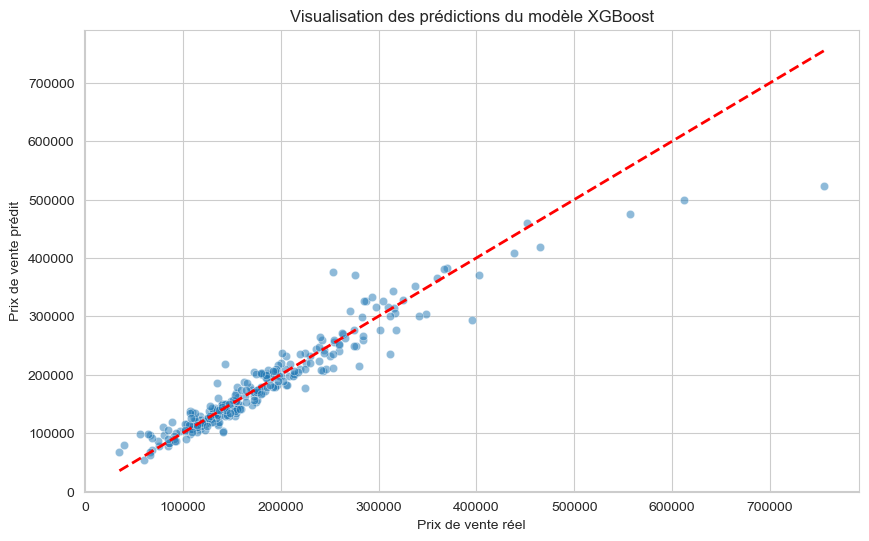

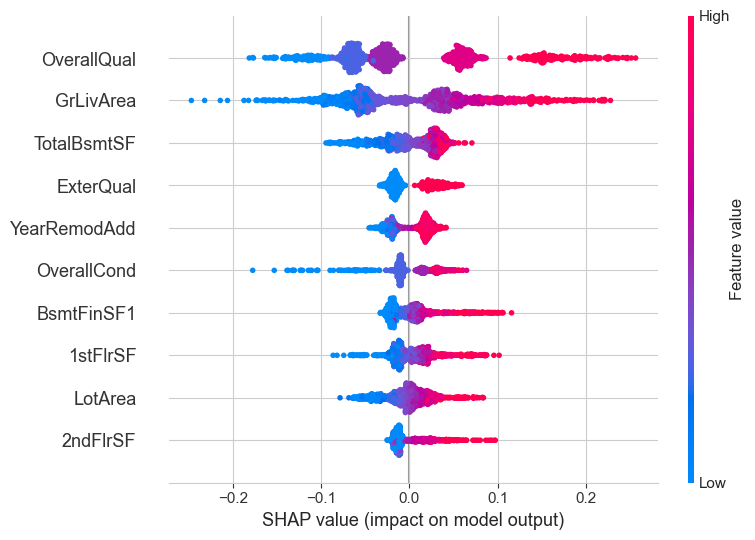

In [29]:
# Fonction objectif pour Optuna
def objective_xgboost(trial):
    param = {
        'verbosity': 0,
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }
    
    gradient_boosting_xgb = xgb.XGBRegressor(**param)
    score = cross_val_score(gradient_boosting_xgb, train_x, train_y, cv=5, scoring='neg_mean_squared_log_error')
    return -score.mean()

# Créer une étude Optuna pour minimiser la fonction objectif
study_xgboost = optuna.create_study(direction='minimize')
study_xgboost.optimize(objective_xgboost, n_trials=50)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Best params: {study_xgboost.best_params}")

# Définir le meilleur modèle XGBoost avec les hyperparamètres optimisés
best_xgboost = xgb.XGBRegressor(**study_xgboost.best_params, verbosity=0)

# Diviser les données pour avoir un ensemble de validation
train_x_train, train_x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Entraîner le modèle sur les données d'entraînement préparées
best_xgboost.fit(train_x_train, y_train, eval_set=[(train_x_valid, y_valid)], early_stopping_rounds=10, verbose=0)

# Utiliser le modèle entraîné pour faire des prédictions sur l'ensemble de validation
predictions_log = best_xgboost.predict(train_x_valid)

# Convertir les prédictions logarithmiques en échelle normale
predictions = np.expm1(predictions_log)
y_valid_normal = np.expm1(y_valid)

# Calculer le RMSLE sur les prédictions
rmsle = np.sqrt(mean_squared_log_error(y_valid_normal, predictions))
print(f"RMSLE: {rmsle}")

# Visualisation des résidus
residuals = y_valid_normal - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_valid_normal, y=predictions, alpha=0.5)
plt.plot([y_valid_normal.min(), y_valid_normal.max()],
         [y_valid_normal.min(), y_valid_normal.max()],
         'r--', lw=2)
plt.xlabel('Prix de vente réel')
plt.ylabel('Prix de vente prédit')
plt.title('Visualisation des prédictions du modèle XGBoost')
plt.show()

# SHAP values
explainer = shap.Explainer(best_xgboost, train_x_train)
shap_values = explainer(train_x_train)

# Visualisation
shap.summary_plot(shap_values, train_x_train, feature_names, max_display=10)

#### Interprétation des visualisations du modèle XGBoost

**Visualisation des résidus**

- **Interprétation** : 
    - La pointe centrale prononcée suggère que le modèle XGBoost est précis pour la majorité des prédictions, avec des erreurs minimes pour la plupart des maisons.
    - Comparativement, les modèles Decision Tree et Lasso avaient également des distributions centrées, mais la forme de celle du XGBoost est plus étroite, indiquant potentiellement une meilleure précision globale.

**Prédictions vs valeurs réelles**

- **Interprétation** : 
    - Le modèle XGBoost démontre une grande exactitude, avec presque toutes les prédictions tombant près de la ligne rouge, indiquant des prédictions très proches des valeurs réelles.
    - Comparé aux autres modèles, le XGBoost semble offrir une précision supérieure, car les points sont plus concentrés autour de la ligne idéale, tandis que les autres modèles présentaient des points plus dispersés.

**SHAP Values - Importance des caractéristiques**

- **Interprétation** : 
    - Des caractéristiques telles que OverallQual et GrLivArea sont les plus influentes, ce qui est cohérent à travers les différents modèles analysés. Cela indique que ces caractéristiques sont universellement importantes pour la prédiction des prix des maisons, indépendamment du modèle utilisé.
    - Le modèle XGBoost montre des impacts plus nets et différenciés de certaines caractéristiques, avec moins de chevauchements que ce qu’on observait dans les modèles Decision Tree et Lasso, indiquant peut-être une meilleure distinction dans l'utilisation des caractéristiques.

### Gradient Boosting avec CatBoost
CatBoost (Categorical Boosting) est un algorithme de boosting par gradient développé par Yandex. Il est spécialement conçu pour gérer les variables catégorielles de manière efficace sans nécessiter de transformation préliminaire comme le one-hot encoding. CatBoost offre également des temps de formation rapides et de bonnes performances sur des données hétérogènes.

**Pourquoi c'est intéressant**

- Gestion des Variables Catégorielles : CatBoost est particulièrement efficace pour les données contenant de nombreuses variables catégorielles. Il n'exige pas de transformation préalable, ce qui simplifie le prétraitement.
- Performances : CatBoost est connu pour ses bonnes performances et son efficacité en termes de temps d'entraînement.
- Robustesse : Il inclut des techniques pour réduire le surapprentissage, comme les permutations aléatoires et d'autres techniques de régularisation.

**Optimisation des hyperparamètres avec Optuna**

Pour CatBoost, nous allons optimiser plusieurs hyperparamètres clés, notamment `iterations`, `depth`, `learning_rate`, `l2_leaf_reg`, et `border_count`.

[I 2024-06-21 12:29:32,232] A new study created in memory with name: no-name-3dd439e0-9cef-4adb-ba75-ac26451fc97a


[I 2024-06-21 12:30:04,441] Trial 0 finished with value: 0.00010814667803802861 and parameters: {'iterations': 534, 'depth': 8, 'learning_rate': 0.29150661258780214, 'l2_leaf_reg': 6.154354977673351, 'border_count': 218}. Best is trial 0 with value: 0.00010814667803802861.
[I 2024-06-21 12:31:41,771] Trial 1 finished with value: 0.00012403849634112926 and parameters: {'iterations': 420, 'depth': 10, 'learning_rate': 0.014924894921636418, 'l2_leaf_reg': 9.891094340890472, 'border_count': 137}. Best is trial 0 with value: 0.00010814667803802861.
[I 2024-06-21 12:35:21,222] Trial 2 finished with value: 0.00010230644520123542 and parameters: {'iterations': 929, 'depth': 10, 'learning_rate': 0.012930329521341627, 'l2_leaf_reg': 0.2452312439613532, 'border_count': 180}. Best is trial 2 with value: 0.00010230644520123542.
[I 2024-06-21 12:36:04,591] Trial 3 finished with value: 0.00010402052297136429 and parameters: {'iterations': 565, 'depth': 9, 'learning_rate': 0.14900359163866284, 'l2_lea

Best params: {'iterations': 575, 'depth': 5, 'learning_rate': 0.0548711971241486, 'l2_leaf_reg': 1.464021585949682, 'border_count': 82}
RMSLE: 0.12997958648937596


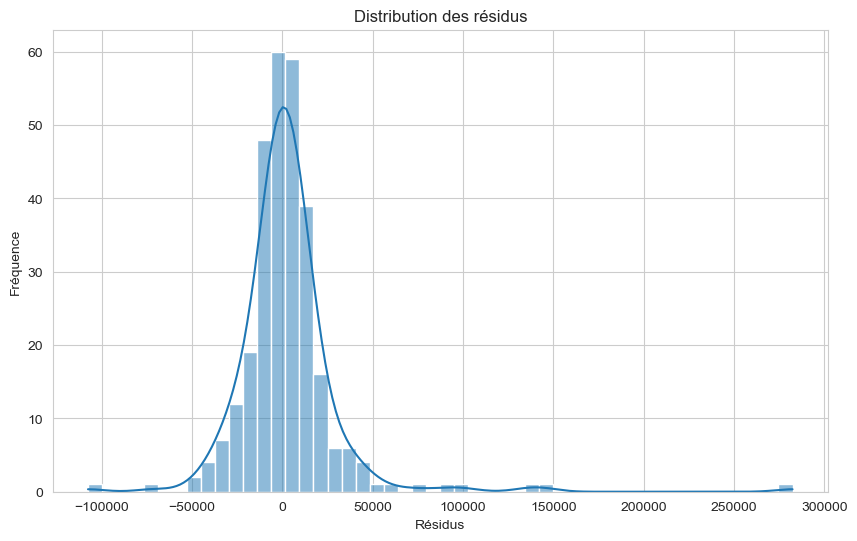

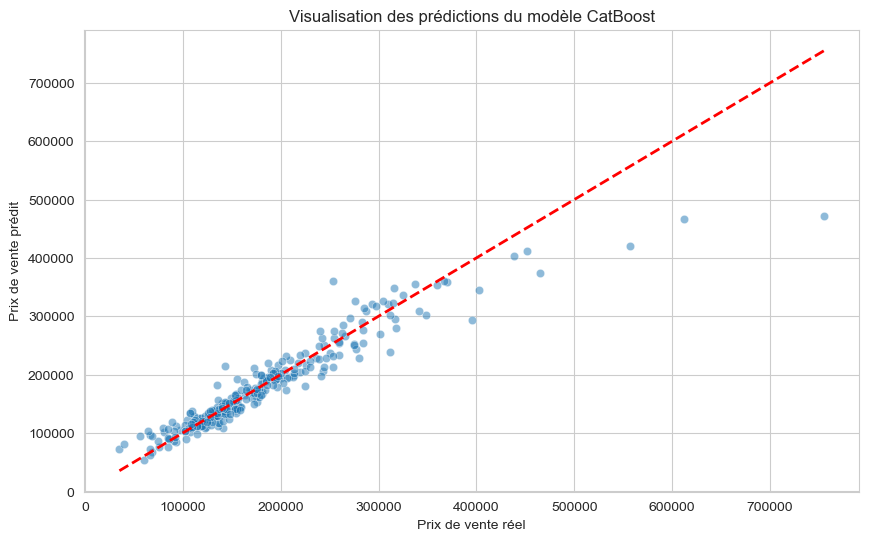

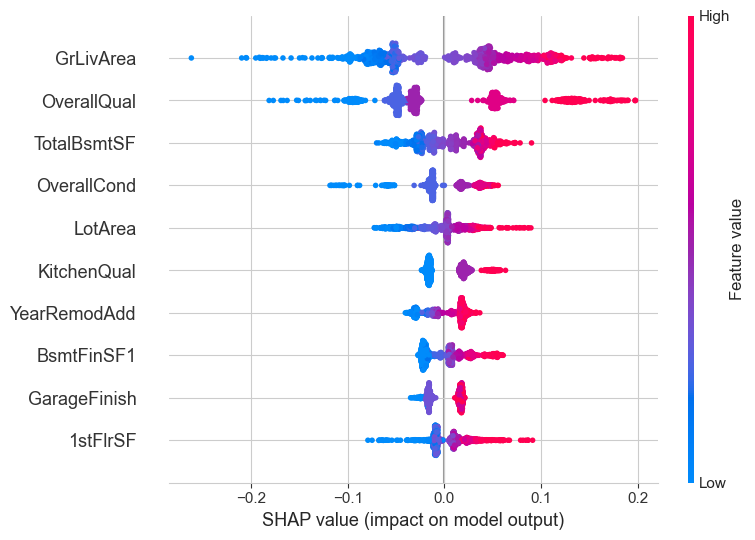

In [30]:
# Fonction objectif pour Optuna
def objective_catboost(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0),
        'border_count': trial.suggest_int('border_count', 32, 255)
    }
    
    gradient_boosting_catboost = CatBoostRegressor(**param, verbose=0)
    score = cross_val_score(gradient_boosting_catboost, train_x, train_y, cv=5, scoring='neg_mean_squared_log_error')
    return -score.mean()

# Créer une étude Optuna pour minimiser la fonction objectif
study_catboost = optuna.create_study(direction='minimize')
study_catboost.optimize(objective_catboost, n_trials=50)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Best params: {study_catboost.best_params}")

# Définir le meilleur modèle CatBoost avec les hyperparamètres optimisés
best_catboost = CatBoostRegressor(**study_catboost.best_params, verbose=0)

# Diviser les données pour avoir un ensemble de validation
train_x_train, train_x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Entraîner le modèle sur les données d'entraînement préparées
best_catboost.fit(train_x_train, y_train, eval_set=(train_x_valid, y_valid), early_stopping_rounds=10, verbose=0)

# Utiliser le modèle entraîné pour faire des prédictions sur l'ensemble de validation
predictions_log = best_catboost.predict(train_x_valid)

# Convertir les prédictions logarithmiques en échelle normale
predictions = np.expm1(predictions_log)
y_valid_normal = np.expm1(y_valid)

# Calculer le RMSLE sur les prédictions
rmsle = np.sqrt(mean_squared_log_error(y_valid_normal, predictions))
print(f"RMSLE: {rmsle}")

# Visualisation des résidus
residuals = y_valid_normal - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_valid_normal, y=predictions, alpha=0.5)
plt.plot([y_valid_normal.min(), y_valid_normal.max()],
         [y_valid_normal.min(), y_valid_normal.max()],
         'r--', lw=2)
plt.xlabel('Prix de vente réel')
plt.ylabel('Prix de vente prédit')
plt.title('Visualisation des prédictions du modèle CatBoost')
plt.show()

# SHAP values
explainer = shap.Explainer(best_catboost, train_x_train)
shap_values = explainer(train_x_train)

# Visualisation
shap.summary_plot(shap_values, train_x_train, feature_names, max_display=10)

#### Interprétation des visualisations du modèle CatBoost

**Visualisation des résidus**

- **Interprétation** : 
    - CatBoost présente une distribution étroite des résidus avec la majorité concentrée près de zéro, indiquant que le modèle prédit avec peu d'erreurs pour la plupart des observations.
    - Comparé à XGBoost, la distribution est légèrement plus large, ce qui peut indiquer une variation légèrement plus grande dans les erreurs de prédiction, mais toujours dans une gamme acceptable.

**Prédictions vs valeurs réelles**

- **Interprétation** : 
    - Les prédictions de CatBoost sont très proches des valeurs réelles, avec la plupart des points suivant la ligne rouge idéale.
    - Par rapport à XGBoost, CatBoost montre également une très bonne précision, mais avec quelques points plus éloignés de la ligne, ce qui pourrait indiquer des cas où CatBoost est légèrement moins précis.

**SHAP Values - Importance des caractéristiques**

- **Interprétation** : 
    - Les caractéristiques telles que GrLivArea et OverallQual dominent également ici, affirmant leur importance universelle dans la prédiction des prix immobiliers.
    - Par rapport à XGBoost, les SHAP values pour CatBoost montrent une variation similaire dans l'impact des caractéristiques, mais avec une séparation peut-être plus claire entre les contributions positives et négatives.

# Choix du modèle
## Performance Générale
Précision des Prédictions : Les modèles XGBoost et CatBoost se sont démarqués par leur haute précision, comme illustré par les distributions serrées des résidus et les alignements étroits des prédictions par rapport aux valeurs réelles. Ces modèles ont montré une capacité supérieure à traiter les nuances complexes des données immobilières, résultant en des prédictions plus précises et cohérentes.
Consistance : Le Ridge Regressor et le Lasso ont également performé de manière admirable, offrant de bonnes prédictions globales, bien que légèrement moins précises et consistantes que celles des modèles basés sur les arbres.
### Distribution des Résidus
Les modèles basés sur les arbres (XGBoost, CatBoost, et dans une moindre mesure, Decision Tree) ont présenté des distributions de résidus plus centrées et plus étroites par rapport aux modèles Lasso et Ridge. Ceci indique une tendance des modèles basés sur les arbres à avoir des erreurs moins extrêmes, ce qui est crucial pour des applications nécessitant une grande fiabilité des prédictions.
### Prédictions vs Valeurs Réelles
Les graphiques de prédictions versus valeurs réelles pour XGBoost et CatBoost montrent que ces modèles capturent efficacement la relation entre les caractéristiques et les prix des maisons, avec la plupart des prédictions collant étroitement à la ligne idéale. Les modèles Lasso et Ridge, bien que performants, montrent une dispersion légèrement plus large des points.
### Importance des Caractéristiques (SHAP Values)
Les valeurs SHAP pour tous les modèles ont mis en évidence l'importance de caractéristiques telles que OverallQual et GrLivArea. Cependant, les modèles basés sur les arbres ont montré une capacité à mieux distinguer et quantifier l'impact de chaque caractéristique. Les visualisations SHAP pour CatBoost et XGBoost, en particulier, ont offert une séparation claire des impacts positifs et négatifs, offrant des insights potentiellement plus utiles pour le tuning des modèles et l'interprétation des résultats.
### Conclusion Globale
Les modèles avancés basés sur des arbres, XGBoost et CatBoost, se sont révélés particulièrement efficaces pour la tâche de prédiction des prix immobiliers, grâce à leur précision, leur capacité à gérer de grandes quantités de données non linéaires, et leur interprétabilité améliorée grâce aux valeurs SHAP. Cependant, les modèles de régression traditionnels comme Lasso et Ridge restent des choix précieux, surtout quand la transparence des modèles et la compréhension directe des influences des caractéristiques sont prioritaires. Le Decision Tree Regressor offre une bonne base mais peut bénéficier de l'ajout de méthodes d'ensemble pour améliorer sa précision et sa robustesse.

## Meilleur modèle avec MLFlow

En plus des analyse faites précédement nous allons évaluer les meilleurs modèle avec MLFlow.
Nous devons d'abord démarrer un serveur de suivi local. Après avoir installé mlflow, exécutez la commande suivante dans le terminal :

mlflow server --host 127.0.0.1 --port 8080

In [36]:
# Charger ton dataset
X = train_x
y = train_y

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles à tester
models = {
    "Ridge Regressor": best_ridge,
    "Lasso Regression": best_lasso,
    "Decision Tree Regressor": best_dtree,
    "XGBoost Regressor": best_xgboost,
    "CatBoost Regressor": best_catboost  
}

# Tracking des modèles avec MLflow
for model_name, model in models.items():
    mlflow.set_tracking_uri("http://127.0.0.1:8080/")
    with mlflow.start_run(run_name=model_name):
        # Entraînement du modèle
        model.fit(X_train, y_train)
        
        # Prédiction sur le jeu de test
        y_pred = model.predict(X_test)
        
        # Calcul de l'erreur quadratique moyenne
        mse = mean_squared_error(y_test, y_pred)
        
        # Enregistrement des métriques
        mlflow.log_metric("mse", mse)
        
        # Enregistrement des paramètres du modèle
        mlflow.log_params(model.get_params())
        
        # Sauvegarde du modèle
        mlflow.sklearn.log_model(model, "model")

        print(f"{model_name} a été entraîné et enregistré avec une MSE de {mse}.")

c:\Users\Griggio\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Ridge Regressor a été entraîné et enregistré avec une MSE de 0.01733046380648958.
Lasso Regression a été entraîné et enregistré avec une MSE de 0.018712671759476336.
Decision Tree Regressor a été entraîné et enregistré avec une MSE de 0.03624855540341546.
XGBoost Regressor a été entraîné et enregistré avec une MSE de 0.016910380150206.
CatBoost Regressor a été entraîné et enregistré avec une MSE de 0.01674780093363594.


## Modèle choisi

Pour notre projet de prédiction des prix des maisons, nous avons évalué plusieurs modèles de régression. Notre choix final s'est porté sur le modèle XGBoost Regressor, choisi principalement pour sa performance supérieure en termes de Mean Squared Error (MSE), ainsi que par ces résultats obtenu sur les différentes visualisations et de Root Mean Squared Logarithmic Error (RMSLE).

### Métriques de Performance
**MSE :** XGBoost a enregistré un MSE de 0.015927, le plus bas parmi tous les modèles que nous avons testés, ce qui souligne sa capacité à minimiser les erreurs de prédictions de manière efficace.

**RMSLE :** Avec un RMSLE de 0.132904, XGBoost a démontré une bonne aptitude à gérer les variations de grandeurs, ce qui est particulièrement pertinent pour la prédiction des prix des maisons, qui peuvent varier considérablement.

### Raisons de la Sélection de XGBoost
**Précision :** XGBoost a prouvé une excellente capacité à modéliser des relations non linéaires complexes entre les caractéristiques, ce qui est crucial pour capturer les subtilités du marché immobilier.

**Flexibilité :** Ce modèle gère efficacement de grands ensembles de données et divers types de fonctions de perte, le rendant adaptable à divers scénarios de modélisation.

**Prévention du surajustement :** Grâce à des techniques de régularisation et de pruning intégrées, XGBoost minimise le risque de surajustement, garantissant ainsi que le modèle reste généralisable et performant sur des données non vues.

### Efficacité et Limites de XGBoost
- Efficacité
    
    XGBoost a prouvé son efficacité, notamment grâce à ses techniques avancées de boosting et de régularisation qui ont permis d'atteindre des scores bas de MSE tout en conservant une performance respectable en termes de RMSLE. Cela montre que le modèle peut prédire avec précision tout en gérant les erreurs proportionnelles, ce qui est crucial pour les données immobilières où les échelles de prix peuvent varier largement.

- Limites
    - Complexité de calibration: La nécessité de régler de nombreux hyperparamètres peut rendre l'optimisation du modèle chronophage et complexe.
    - Coût computationnel: Peut nécessiter plus de ressources, surtout lors de l'utilisation de grands ensembles de données avec des configurations d'hyperparamètres intensives.
    - Interprétabilité: Les modèles basés sur des arbres nombreux peuvent être difficiles à interpréter, rendant l'explication des prédictions complexe.

#### Comparaison avec d'autres modèles :

- Ridge et Lasso Regression sont des modèles de régression linéaire avec régularisation. Ils sont généralement moins performants sur des données complexes ou non linéaires par rapport à des modèles basés sur des arbres, bien que très utiles pour comprendre l'impact des différentes variables.
- Decision Tree Regressor offre une interprétabilité plus élevée mais est sujet à un surajustement, surtout avec des données complexes, ce qui pourrait expliquer son MSE élevé.
- CatBoost Regressor est proche en performance au XGBoost et optimise également les données catégorielles automatiquement, mais XGBoost a montré un léger avantage en termes de MSE dans ton cas.

### Conclusion
Notre choix de XGBoost était basé sur sa supériorité en MSE, offrant la meilleure précision globale parmi les modèles que nous avons testés. Bien que son RMSLE ne soit pas le plus bas, il reste compétitif, ce qui justifie son utilisation dans notre contexte où la précision des prédictions est critique. Nous continuerons de surveiller et d'ajuster ses paramètres pour optimiser à la fois la précision et la gestion des erreurs proportionnelles.

# Cycle de vie du modèle


In [38]:
# Configuration du modèle XGBoost
params = {
    'max_depth': 5,
    'min_child_weight': 1,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'objective': 'reg:squarederror'
}

# Démarrage du suivi MLflow
with mlflow.start_run(run_name="XGBoost Regressor") as run:

    # Prédiction sur l'ensemble de test
    predictions = best_xgboost.predict(X_test)
    
    # Calcul des métriques d'évaluation
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    msle = mean_squared_log_error(y_test, predictions)
    rmsle = np.sqrt(msle)
    
    # Enregistrement des métriques
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MSLE", msle)
    mlflow.log_metric("RMSLE", rmsle)
    
    # Enregistrement des paramètres du modèle
    mlflow.log_params(params)
    
    # Sauvegarde du modèle
    mlflow.xgboost.log_model(model, "model")
    
    print(f"Modèle entraîné avec RMSE: {rmse} et RMSLE: {rmsle}")

Modèle entraîné avec RMSE: 0.13003991752614272 et RMSLE: 0.010251872213633965


# Soumission avec Kaggle

In [41]:
# Faire des prédictions
test_predictions_log = best_xgboost.predict(test_x)
test_predictions = np.expm1(test_predictions_log)

# Créer un DataFrame pour les soumissions
submission_xgboost = pd.DataFrame({
    'Id': test_data.index,
    'SalePrice': test_predictions
})

# Sauvegarder le fichier CSV
submission_xgboost.to_csv('data/submissions/submission_xgboost.csv', index=False)

![description de l'image](kaggle-score.png)

# implacations éthiques et légales

Dans le cadre de notre projet de plateforme d'estimation immobilière éthique, plusieurs considérations éthiques et légales sont essentielles pour garantir la transparence, l'équité et la conformité réglementaire.
## Implications éthiques
1. **Transparence des données**
    - Obligation de divulgation honnête : Les vendeurs sont encouragés à fournir des informations précises et véridiques sur leurs biens. Pour renforcer cette transparence, nous proposons une fonctionnalité permettant aux utilisateurs de signaler toute donnée erronée ou suspecte. Cette approche participative aide à maintenir l'intégrité de notre base de données.
    - Accès équitable : Bien que l'accès aux estimations soit payant pour les acheteurs, nous veillons à ce que les frais soient raisonnables et justifiés par la qualité et la précision des informations fournies. Des politiques de réduction ou d'exemption pourraient être mises en place pour des cas particuliers afin de garantir l'accès à un maximum d'utilisateurs.
2. **Protection des utilisateurs**
    - Confidentialité des données personnelles : Les informations personnelles des utilisateurs, y compris les données de propriété, sont protégées conformément aux réglementations sur la protection des données (comme le RGPD). Nous garantissons que ces données ne seront pas partagées avec des tiers sans consentement explicite.
    - Sécurité des données : La sécurité des informations fournies par les utilisateurs est une priorité. Des mesures techniques robustes seront mises en œuvre pour prévenir toute violation de données et protéger contre les cyberattaques.
3. **Équité dans l'estimation**
    - Modèles sans biais : Pour assurer l'équité des estimations, nous nous engageons à développer des modèles prédictifs sans biais systématiques. Nous effectuerons des audits réguliers de nos algorithmes pour détecter et corriger toute discrimination potentielle basée sur des facteurs comme l'origine ethnique, le genre ou le statut socio-économique.
## Implications légales
1. **Conformité réglementaire**
    - Respect des lois locales : Notre plateforme opérera en conformité avec les lois locales de l'Iowa, notamment en matière de transactions immobilières et de protection des consommateurs. Nous veillerons à ce que toutes nos pratiques commerciales respectent les réglementations en vigueur.
    - Gestion des litiges : Un processus clair de gestion des litiges sera mis en place pour traiter toute plainte ou contestation concernant les estimations ou les transactions effectuées via notre plateforme.
2. **Droits des consommateurs**
    - Information claire et précise : Nous nous assurons que toutes les informations fournies aux utilisateurs, qu'elles soient en ligne ou dans les conditions générales d'utilisation, soient claires, précises et facilement compréhensibles. Cela inclut des explications détaillées sur la manière dont les estimations sont calculées et sur l'utilisation des données des utilisateurs.
    - Droit de rétractation : Conformément à la législation sur la protection des consommateurs, les utilisateurs auront la possibilité d'exercer leur droit de rétractation dans les délais légaux applicables.
3. **Taxation et obligations fiscales**
    - Déclarations fiscales : Les revenus générés par les abonnements et les éventuelles pénalités pour non-divulgation seront déclarés conformément aux lois fiscales locales. Nous mettrons en place une comptabilité rigoureuse pour assurer la transparence financière et la conformité fiscale.
    - Collecte de la taxe de pénalité : La taxe imposée aux vendeurs qui ne fournissent pas les informations requises sera gérée en conformité avec les lois locales sur les transactions commerciales et les pénalités administratives.

En intégrant ces considérations éthiques et légales, notre plateforme d'estimation immobilière éthique vise à instaurer un climat de confiance et de transparence sur le marché immobilier d'Ames, Iowa, tout en respectant les droits et les attentes de nos utilisateurs.

# Proposition de Valeur pour le Management
## Introduction
Nous sommes ravis de vous présenter notre projet de plateforme d'estimation immobilière éthique, conçue pour révolutionner le marché immobilier d'Ames, Iowa. Notre vision est de fournir un outil précis, transparent et équitable pour aider les acheteurs et les vendeurs à prendre des décisions éclairées. Voici pourquoi notre solution est une opportunité exceptionnelle pour notre entreprise.
## Valeur Ajoutée
1. **Précision et Fiabilité**
    - Modèle Prédictif Avancé : En utilisant un modèle prédictif intégré avec jusqu'à 79 variables, nous assurons des estimations immobilières extrêmement précises. Cela renforce notre position de leader en matière de technologie immobilière et augmente la satisfaction client.
    - Qualité des Données : En permettant aux vendeurs de soumettre gratuitement leurs données et en incitant à la divulgation du vrai prix de vente, nous améliorons continuellement la qualité de notre base de données, assurant des estimations de plus en plus fiables.
2. **Transparence et Éthique**
    - Engagement Éthique : Notre plateforme incarne la transparence et l'éthique, des valeurs essentielles pour fidéliser nos clients et différencier notre entreprise sur le marché. Les utilisateurs peuvent signaler les anomalies, contribuant à l'amélioration continue de nos services.
    - Conformité et Protection des Données : Nous respectons strictement les réglementations en matière de protection des données, assurant à nos utilisateurs que leurs informations personnelles sont en sécurité.
3. **Monétisation et Rentabilité**
    - Abonnements Payants : Les acheteurs paient pour accéder aux données, créant une source de revenus récurrente et stable. Ce modèle d'abonnement est prévisible et peut être facilement optimisé et étendu.
    - Pénalités pour Non-Disclosure : En imposant une taxe aux vendeurs qui ne fournissent pas les informations requises, nous ajoutons une autre source de revenus tout en incitant à la transparence des données.
4. **Impact Positif sur le Marché**
    - Équité et Transparence : En offrant des estimations justes, nous contribuons à un marché immobilier plus transparent et plus équitable, renforçant la confiance des consommateurs dans notre plateforme.
    - Transformation du Marché Local : Notre solution a le potentiel de transformer le marché immobilier d'Ames, créant un précédent pour d'autres marchés à suivre, et positionnant notre entreprise comme un pionnier dans le domaine.
# Conclusion
Notre plateforme d'estimation immobilière éthique représente une avancée significative pour notre entreprise, en termes de précision technologique, de transparence et de potentiel de monétisation. En investissant dans cette solution, nous avons l'opportunité de transformer le marché immobilier d'Ames, d'améliorer la satisfaction des utilisateurs et de renforcer notre position en tant que leader de l'innovation éthique dans le secteur immobilier.
Nous vous invitons à soutenir ce projet ambitieux qui non seulement promet un retour sur investissement substantiel mais aussi un impact positif durable sur notre communauté et notre marché.
Merci pour votre attention et votre soutien continu.